# **Table of Contents**

* __[1. Import Data](#import)__
  * [1.1 Import the needed libraries and documents into Jupyter Notebook](#lib)
  * [1.2. Check for duplicates](#duplicates)
* __[2. Explore Data](#explore_data)__
  * [2.1. Basic Exploration](#basic_exploration)
  * [2.2. Statistical Exploration](#statistical_exploration)
    * [2.2.1 Numerical Variables](#numerical)
    * [2.2.2 Categorical Variables](#categorical)
  * [2.3 Visual Exploration](#visual_exploration)
    * [2.3.1 Outliers](#check_outliers)
    * [2.3.2 Missing Values](#check_missing_values)
* __[3. Preprocess Data](#pprocess_data)__    
  * [3.1. Data Cleaning](#data_cleaning)
    * [3.1.1. Outliers](#outliers)
    * [3.1.2. Missing Values](#missing_values)
* __[4. Explore Data after Cleaning](#explore_data_after_cleaning)__
* __[5. Modelling](#modelling)__
  * [5.1. Normalizing Data](#normalizing_data)
  * [5.2. Identifying the right number of clusters](#clusters)
  * [5.3. Training the model with K-Means](#kmeans)
  * [5.4. Applying K-means after performing PCA](#KMeans_after_PCA)
  * [5.5. Applying DBSCAN](#DBSCAN)
* __[6. Analyzing Further](#analyzing_further)__
  * [6.1. K-Means Clusters](#analyzing_kmeans)
  * [6.2. K-Means with Categorical Variables](#analyzing_categorical)

<a name='import'>
    
<font color = '#BED62F'>
    
# **1. Import Data** </font>
</a>

<a name='lib'></a>

<font color = '#BED62F'>

## **1.1. Import the needed libraries and documents into Jupyter Notebook**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score as ss
import itertools
from sklearn.cluster import DBSCAN

In [2]:
# Load the data into a Pandas DataFrame
listings = pd.read_csv('listings.csv')

In [3]:
# Display the first three rows of the DataFrame
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,935509480248268779,RC pascoal Q3,236955701,Vagner,Lisboa,Arroios,38.731989,-9.138308,Private room,30.0,1,9,2023-12-25,1.14,31,61,9,115251/AL
1,1033186766563842755,"Twin room city center, tourists spot, city centre",185898036,Flavio,Lisboa,Arroios,38.727730,-9.142410,Private room,32.0,1,5,2024-02-26,1.44,110,3,5,Exempt
2,955103410770875754,Central Lisbon Stylish Apartment,531095694,Luís,Lisboa,Estrela,38.708280,-9.170880,Entire home/apt,75.0,3,11,2024-01-12,1.54,1,266,11,123417/AL
3,790314265525149124,Quarto iluminado com varanda,453929593,Mariana,Lisboa,Arroios,38.727254,-9.136234,Private room,37.0,1,50,2024-03-15,3.68,7,346,43,112845/AL
4,28040202,Páteo Saudade Rooms,32743314,Heleno & Silva,Lisboa,Arroios,38.729560,-9.134470,Private room,40.0,2,14,2019-09-28,0.21,15,76,0,82000/AL


<a name='duplicates'></a>

<font color = '#BED62F'>

## **1.2. Check for duplicates**

In [4]:
# Check for duplicates
listings[listings.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license


<a name='explore_data'></a>

<font color = '#C04000'>
    
# **2. Explore Data** </font>

<a name='basic_exploration'></a>

<font color = '#C04000'>

## **2.1. Basic Exploration**

In [5]:
# Check the dimensions of the DataFrame
listings.shape

(22929, 18)

In [6]:
# Check the data info of each column
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22929 entries, 0 to 22928
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22929 non-null  int64  
 1   name                            22929 non-null  object 
 2   host_id                         22929 non-null  int64  
 3   host_name                       22929 non-null  object 
 4   neighbourhood_group             22929 non-null  object 
 5   neighbourhood                   22929 non-null  object 
 6   latitude                        22929 non-null  float64
 7   longitude                       22929 non-null  float64
 8   room_type                       22929 non-null  object 
 9   price                           20029 non-null  float64
 10  minimum_nights                  22929 non-null  int64  
 11  number_of_reviews               22929 non-null  int64  
 12  last_review                     

<br> __By the results above, we can verify that we are working with:__
- 4 float variables;
- 7 integer variables;
- 7 object variables.

We can also verify that some of the variables have missing values in `price`, `last_review`, `reviews_per_month` and `licence`.

<a name='statistical_exploration'></a>

<font color = '#C04000'>

## **2.2. Statistical Exploration**

In [7]:
# Making a copy of the dataset to maintain the original
listings_df = listings.copy()

In [8]:
# Setting the index based on `id` column for demonstration purposes
listings_df.set_index(["id"], inplace=True)

<a name='numerical'></a>

<font color = '#C04000'>

### **2.2.1. Numerical Variables**

In [9]:
# Checking all numerical variables
listings_df.select_dtypes(include=['number']).head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,,,,,,,,,,
935509480248268779,236955701,38.731989,-9.138308,30.0,1,9,1.14,31,61,9
1033186766563842755,185898036,38.727730,-9.142410,32.0,1,5,1.44,110,3,5
955103410770875754,531095694,38.708280,-9.170880,75.0,3,11,1.54,1,266,11
790314265525149124,453929593,38.727254,-9.136234,37.0,1,50,3.68,7,346,43
28040202,32743314,38.729560,-9.134470,40.0,2,14,0.21,15,76,0


__Numerical Variables we decided to exclude from our analysis:__
* __`Latitude and Longitude:`__ These geographical coordinates provide the exact location of each listing. While they are crucial for mapping and spatial analysis, they do not directly contribute to understanding the characteristics or performance of the listings in the context of our current clustering and segmentation analysis. Our primary focus is on understanding patterns in pricing, booking behaviors, and host activity, which can be indirectly inferred through neighborhood data rather than exact coordinates.
* __`Number of Reviews:`__ Although the number of reviews indicates the overall popularity of a listing, we decided to use reviews_per_month instead. Reviews_per_month provides a normalized view of review activity over time, giving us a better understanding of current engagement levels. This is more insightful for identifying recent trends and patterns in listing performance.
* __`Number of Reviews LTM (Last Twelve Months):`__ Similar to the total number of reviews, this variable provides information on recent engagement. However, reviews_per_month already captures this information in a more standardized form. Including both could introduce redundancy without adding significant value to our analysis.
* __`Availability 365:`__ This variable indicates the total number of days a listing is available within a year. While it provides insights into the potential availability of a listing, its values do not necessarily reflect the reality of the listing's usage. A listing may not be available because it has been booked by a guest or blocked by the host. Consequently, high availability does not directly correlate with booking frequency, and vice versa. Given that this variable does not directly impact our focus areas, such as pricing strategies, booking frequency, and host activity, it was deemed less critical for our current objectives.

In [10]:
# Selecting the numerical variables of our interest
listings_df_num_columns = listings_df[['price', 'minimum_nights', 'reviews_per_month', 'calculated_host_listings_count']]

In [11]:
# Summary statistics for numerical variables of interest
listings_df_num_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
price,20029.0,127.307953,178.149540,10.00,65.00,90.0,138.00,9200.00
minimum_nights,22929.0,4.608792,18.322379,1.00,1.00,2.0,3.00,1000.00
reviews_per_month,19591.0,1.451903,1.473426,0.01,0.39,1.0,2.11,38.75
calculated_host_listings_count,22929.0,19.830302,46.347022,1.00,1.00,4.0,14.00,289.00


__We can check that:__ <br>

__`price`__:
* Mean: The average price per night is approximately €127.31
* 50%: The median price is €90.00.
* Std: The standard deviation is €178.15, indicating a high variability in prices.
* Max: The maximum price is €9200.00, which suggests the presence of extremely high-end listings or possibly erroneous data. 
* _Key Takeaways: __The price range is quite wide__, with some extremely high-end or potentially erroneous listings skewing the maximum._

__`minimum_nights`__:
* Mean: The average minimum nights stay is approximately 4.61 nights.
* 75%: The 75th percentile is 3 nights.
* Std: The standard deviation is 18.32, indicating that while most listings have low minimum night requirements, some require significantly longer stays.
* Max: The maximum is 1000 nights, which is likely an outlier or erroneous data.
* _Key Takeaways: Most listings have low minimum night requirements, but __there are outliers with very high minimum stays__._

__`reviews_per_month`__:
* 75%: The 75th percentile is 2.11 reviews per month.
* Max: The maximum is 38.75 reviews per month, which seems unusually high and might warrant further investigation.
* _Key Takeaways: The number of reviews per month is __generally low__, with a few listings receiving a high number of reviews monthly._

__`calculated_host_listings_count`__ (the number of listings the host has in the current scrape, in the city/region geography):
* Std: The standard deviation is 46.35, indicating a wide range of host listings.
* 50%: The median is 4 listings.
* 75%: The 75th percentile is 14 listings.
* Max: The maximum is 289 listings, indicating some hosts manage a very large number of properties.
* _Key Takeaways: __There are hosts with a large number of listings, which might indicate commercial operations__ rather than individual hosts._

<a name='categorical'></a>

<font color = '#C04000'>

### **2.2.2. Categorical Variables**

In [12]:
# Checking all categorical variables
listings_df.select_dtypes(include=['O']).head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review,license
id,,,,,,,
935509480248268779,RC pascoal Q3,Vagner,Lisboa,Arroios,Private room,2023-12-25,115251/AL
1033186766563842755,"Twin room city center, tourists spot, city centre",Flavio,Lisboa,Arroios,Private room,2024-02-26,Exempt
955103410770875754,Central Lisbon Stylish Apartment,Luís,Lisboa,Estrela,Entire home/apt,2024-01-12,123417/AL
790314265525149124,Quarto iluminado com varanda,Mariana,Lisboa,Arroios,Private room,2024-03-15,112845/AL
28040202,Páteo Saudade Rooms,Heleno & Silva,Lisboa,Arroios,Private room,2019-09-28,82000/AL


__Categorical Variables we decided to exclude from our analysis:__
* __`Name:`__ The 'name' column contains the specific names of each listing. While this information is unique to each property and can be useful for identification purposes, it does not provide meaningful insights for our analysis. The names are highly specific and varied, making it difficult to extract patterns or trends relevant to our objectives.
* __`Last Review:`__ This column indicates the date of the last review for each listing. While it provides a timeline of guest interactions, it does not directly contribute to understanding the broader patterns of listing performance or host behavior. Additionally, the presence of a review date does not indicate the frequency or quality of the reviews, making it less useful for our analysis.
* __`License:`__ The 'license' column contains the permit or registration number for each listing. Similar to the 'name' column, this information is highly specific and varies significantly between listings. It does not provide insights into the listing's performance, market positioning, or host behavior. Moreover, the focus of our analysis is on operational and market dynamics rather than regulatory compliance, making this variable less critical.

In [13]:
# Selecting the categorical variables of our interest
listings_df_cat_columns = listings_df[['host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']]

In [14]:
# Getting the main descriptive statistics for all the categorical variables
listings_df_cat_columns.describe().T

,count,unique,top,freq
host_name,22929,3562,Pedro,534
neighbourhood_group,22929,16,Lisboa,15752
neighbourhood,22929,129,Santa Maria Maior,3260
room_type,22929,4,Entire home/apt,16968


__We can check that:__

* __`host_name`__: 3,562 unique values, most frequent host name is "Pedro" appearing 534 times.
* __`neighbourhood_group`__: 16 unique values, "Lisboa" is the most common with 15,752 listings.
* __`neighbourhood`__: 129 unique values, "Santa Maria Maior" is the most common with 3,260 listings.
* __`room_type`__: 4 unique values, "Entire home/apt" is the most common with 16,968 listings.

neighbourhood_group
Lisboa                   15752
Cascais                   2133
Sintra                    1589
Mafra                     1277
Lourinh                    474
Oeiras                     448
Torres Vedras              327
Loures                     278
Amadora                    219
Odivelas                   135
Alenquer                    95
Vila Franca De Xira         90
Cadaval                     60
Sobral De Monte Agrao       26
Azambuja                    16
Arruda Dos Vinhos           10
Name: count, dtype: int64


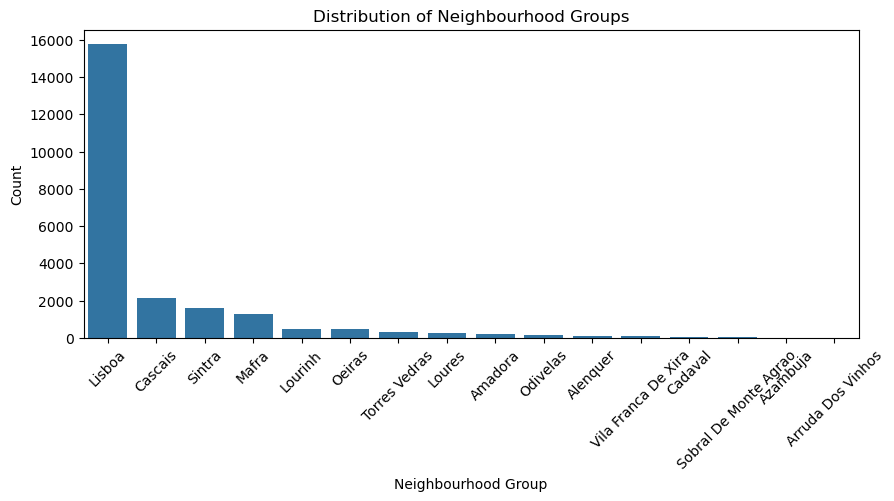

In [15]:
# Distribution of neighbourhood groups
neighbourhood_group_counts = listings_df['neighbourhood_group'].value_counts()
print(neighbourhood_group_counts)

# Visualize the distribution of neighbourhood groups
plt.figure(figsize=(10, 4))
sns.countplot(data=listings_df, x='neighbourhood_group', order=neighbourhood_group_counts.index)
plt.title('Distribution of Neighbourhood Groups')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

* __`Lisboa:`__ The majority of listings are concentrated in Lisboa neighbourhood group, with 15,752 out of 22,929 listings (approximately 69%). __This suggests that Lisboa is the most popular area for Airbnb listings in the dataset.__
* __`Other Notable Groups:`__ __Cascais (2,133 listings) and Sintra (1,589 listings) also have a significant number of listings, indicating their popularity as tourist destinations.__ Other neighbourhood groups have relatively fewer listings, with the smallest being Arruda dos Vinhos (10 listings).

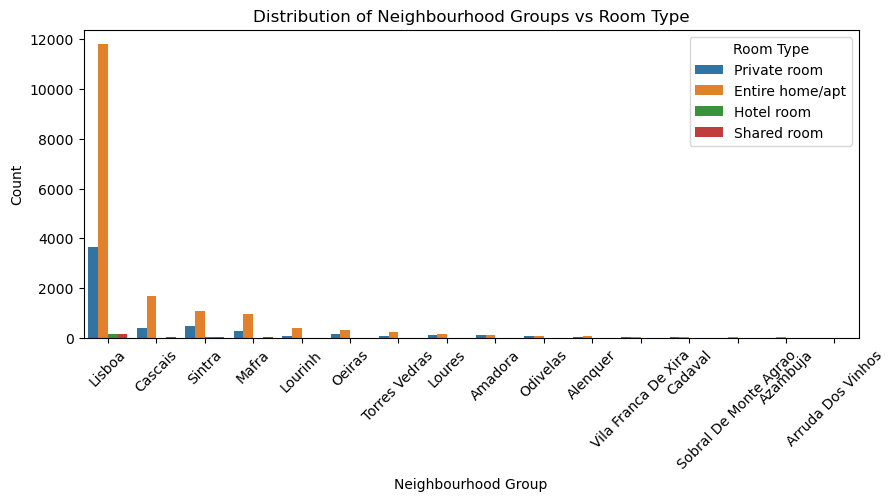

In [16]:
# Visualize the distribution of neighbourhood groups considering the room types
plt.figure(figsize=(10, 4))
sns.countplot(data=listings_df, x='neighbourhood_group', hue='room_type', order=neighbourhood_group_counts.index)
plt.title('Distribution of Neighbourhood Groups vs Room Type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()

neighbourhood
Santa Maria Maior                                    3260
Misericrdia                                          2404
Arroios                                              2067
Cascais e Estoril                                    1467
Santo Antnio                                         1369
So Vicente                                           1195
Estrela                                               950
Ericeira                                              763
S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim     706
Avenidas Novas                                        676
Name: count, dtype: int64


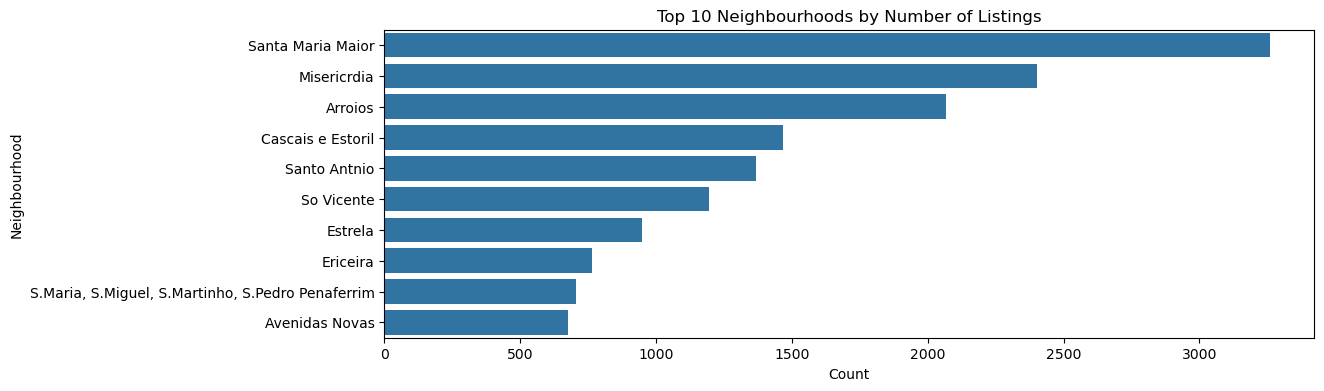

In [17]:
# Distribution of neighbourhoods
neighbourhood_counts = listings_df['neighbourhood'].value_counts().head(10)  # Display top 10 neighbourhoods
print(neighbourhood_counts)

# Visualize the distribution of neighbourhoods
plt.figure(figsize=(12, 4))
sns.countplot(data=listings_df, y='neighbourhood', order=neighbourhood_counts.index)
plt.title('Top 10 Neighbourhoods by Number of Listings')
plt.xlabel('Count')
plt.ylabel('Neighbourhood')
plt.show()

* __`Top Neighbourhoods:`__ Within Lisboa group, the top neighbourhoods are __Santa Maria Maior (3,260 listings), Misericórdia (2,404 listings), and Arroios (2,067 listings).__ These areas are central and likely have many tourist attractions, making them popular for short-term rentals.
* __`Coastal Neighbourhoods:`__ __Cascais e Estoril (1,467 listings) and Ericeira (763 listings) are prominent coastal areas, known for their beaches and tourist appeal.__
* __`Other Central Neighbourhoods:`__ Santo António (1,369 listings), São Vicente (1,195 listings), and Estrela (950 listings) are also significant, indicating a high density of listings in central Lisboa.

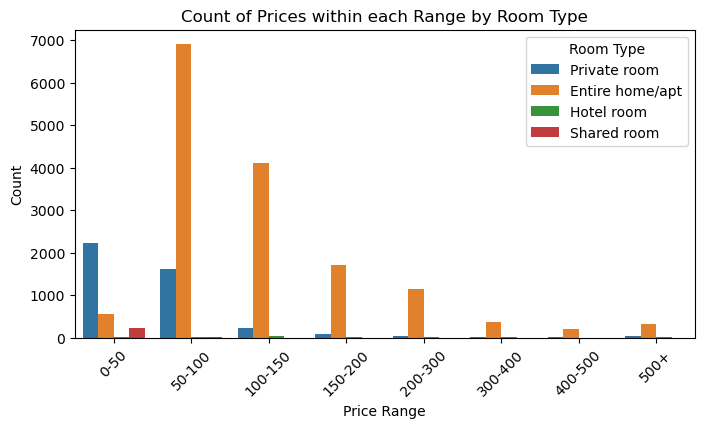

In [18]:
# Define price bins to check the price range
price_bins = [0, 50, 100, 150, 200, 300, 400, 500, np.inf]
price_labels = ['0-50', '50-100', '100-150', '150-200', '200-300', '300-400', '400-500', '500+']

# Bin the prices
listings_df['price_range'] = pd.cut(listings_df['price'], bins=price_bins, labels=price_labels, include_lowest=True)

# Visualize the count of prices within each range by room type
plt.figure(figsize=(8, 4))
sns.countplot(data=listings_df, x='price_range', hue='room_type')
plt.title('Count of Prices within each Range by Room Type')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()

room_type
Entire home/apt    16968
Private room        5480
Shared room          284
Hotel room           197
Name: count, dtype: int64


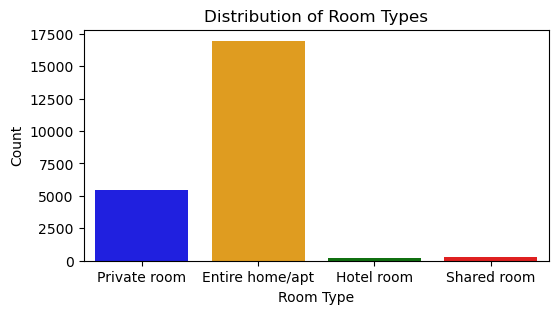

In [19]:
# Distribution of room types
room_type_counts = listings_df['room_type'].value_counts()
print(room_type_counts)

# Define a color palette
custom_palette = ['blue', 'orange', 'green', 'red']

# Visualize the distribution of room types
plt.figure(figsize=(6, 3))
sns.countplot(data=listings_df, x='room_type', palette=custom_palette)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

* __`Preference for Entire Home/Apt:`__ __The majority of listings are for entire homes or apartments (16,968 out of 22,929 listings, approximately 74%).__ This suggests that guests prefer the privacy and convenience of having an entire place to themselves.
* __`Private Rooms:`__ A significant number of listings are for private rooms (5,480 listings), which __may suit budget-conscious travelers or those looking for a more social experience.__
* __`Less Common Options:`__ __Shared rooms (284 listings) and hotel rooms (197 listings) are much less common__, indicating lower demand for these types of accommodations.

host_info
Feels Like Home (3953109)             289
Blueground (447375630)                221
Ukio (419162816)                      187
Pedro (505424337)                     150
BnBird (76223539)                     146
Altido (1756107)                      121
Flavio (185898036)                    110
Alexandra Pedro And Team (5691663)    102
Luís (186448151)                       99
LisBeyond (15900664)                   74
Name: count, dtype: int64


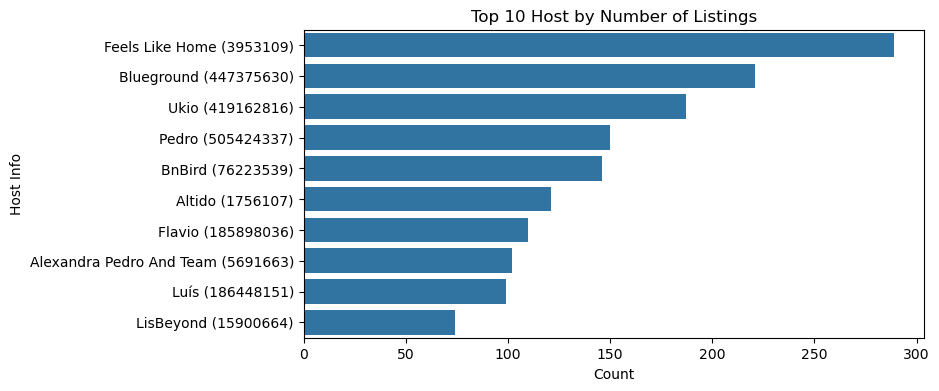

In [20]:
# Joining the columns host_id and host_name to create a new column host_info and identify the top hosts
listings_df['host_info'] = listings_df['host_name'] + ' (' + listings_df['host_id'].astype(str) + ')'

# Selecting top 10 host infos
host_name_counts = listings_df['host_info'].value_counts().head(10)
print(host_name_counts)

# Visualize the top 10 host infos
plt.figure(figsize=(8, 4))
sns.countplot(data=listings_df, y='host_info', order=host_name_counts.index)
plt.title('Top 10 Host by Number of Listings')
plt.xlabel('Count')
plt.ylabel('Host Info')
plt.show()

* __`Dominance of Feels Like Home:`__ The host "Feels Like Home (3953109)" has a significantly higher number of listings compared to the other hosts, with over 200 listings. This indicates a dominant presence in the market.
* __`Top Hosts with High Listing Counts:`__ Following "Feels Like Home," the next highest hosts are "BnBird (76223539)" and "Alexandra Pedro And Team (5691663)" with notable but fewer listings compared to the top host.
* __`Diverse Range of Hosts:`__ The other hosts in the top 10 also have substantial numbers of listings, ranging from about 50 to 100 listings each, showing a diverse range of hosts who manage a significant number of properties.
* __`Potential Professional Management:`__ __The presence of hosts with numerous listings suggests that these might be professional property managers or companies rather than individual hosts__, which could imply a trend towards professional management in the rental market.
* __`Competitive Landscape:`__ The spread of the number of listings among the top 10 hosts indicates a competitive landscape where multiple hosts have a strong foothold in the market.

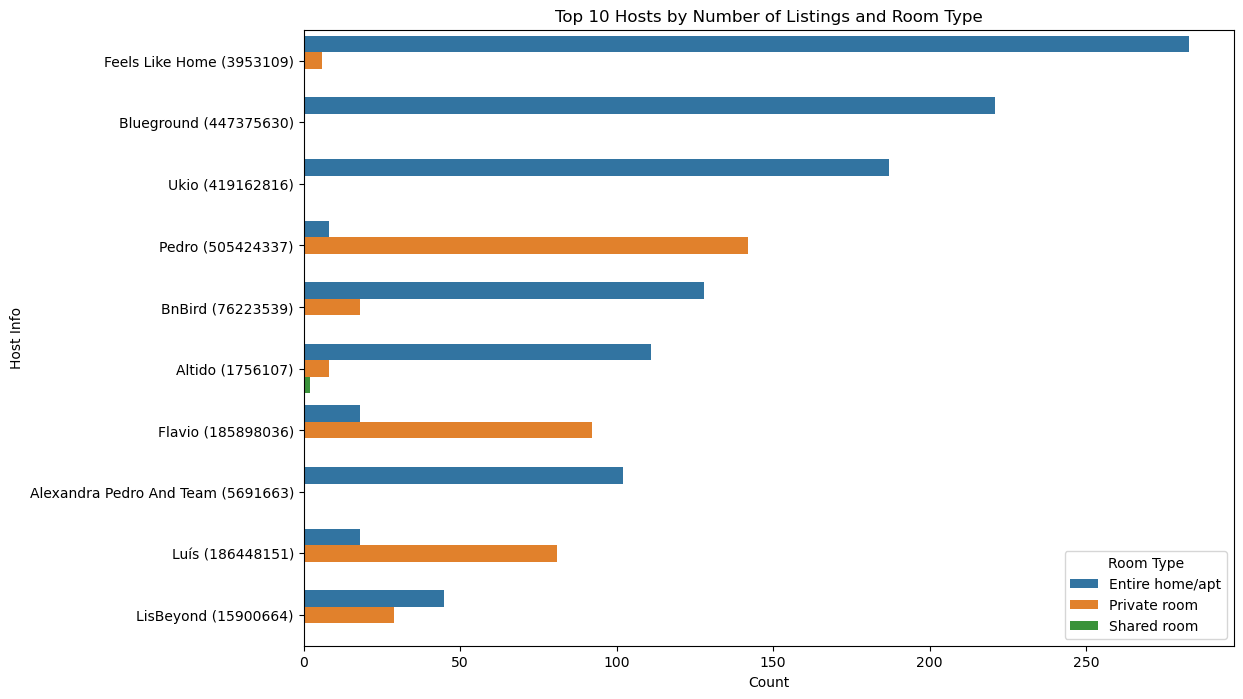

In [21]:
# Group by host_info and room_type, then count the number of listings
host_room_counts = listings_df.groupby(['host_info', 'room_type']).size().reset_index(name='count')

# Get the top 10 host_info overall
top_hosts = host_room_counts.groupby('host_info')['count'].sum().nlargest(10).index

# Filter to include only the top 10 hosts
top_host_room_counts = host_room_counts[host_room_counts['host_info'].isin(top_hosts)]

# Calculate the total count for each host_info
total_counts = top_host_room_counts.groupby('host_info')['count'].sum().reset_index(name='total_count')

# Merge the total counts with the filtered data
top_host_room_counts = top_host_room_counts.merge(total_counts, on='host_info')

# Sort the data by total_count
top_host_room_counts = top_host_room_counts.sort_values(by='total_count', ascending=False)

# Visualize the top 10 host_info by room_type
plt.figure(figsize=(12, 8))
sns.barplot(data=top_host_room_counts, x='count', y='host_info', hue='room_type', dodge=True, order=top_host_room_counts['host_info'].unique())
plt.title('Top 10 Hosts by Number of Listings and Room Type')
plt.xlabel('Count')
plt.ylabel('Host Info')
plt.legend(title='Room Type')
plt.show()

<a name='visual_exploration'></a>

<font color = '#C04000'>

## **2.3. Visual Exploration**

<a name='check_outliers'></a>

<font color = '#C04000'>

### **2.3.1. Outliers**

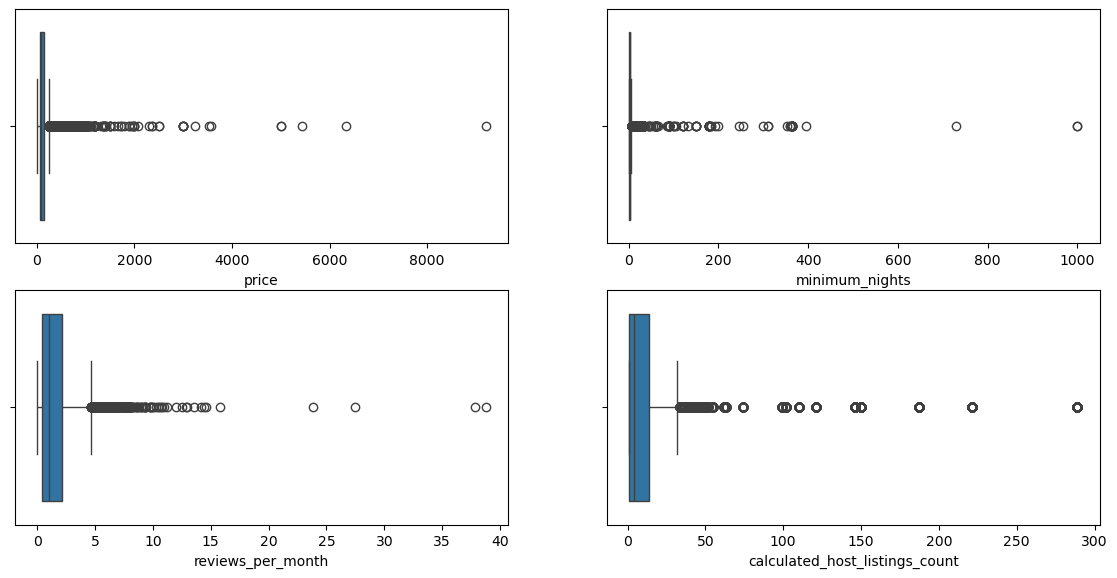

In [22]:
# Identifying outliers with boxplots for numerical variables of our interest
plt.figure(figsize = (14,14))
for i, column in enumerate(listings_df_num_columns.columns):
    ax = plt.subplot(4,2, i+1)
    sns.boxplot(data = listings_df_num_columns, x=column)

<a name='check_missing_values'></a>

<font color = '#C04000'>

### **2.3.2. Missing Values**

In [23]:
# Selecting the columns of interest from the original dataframe
selected_columns = ['price', 'minimum_nights', 'reviews_per_month', 'calculated_host_listings_count', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']
listings_df_columns = listings_df[selected_columns]

# Checking for missing values in our selected data
missing_values = listings_df_columns.isnull().sum()
print(missing_values)

price                             2900
minimum_nights                       0
reviews_per_month                 3338
calculated_host_listings_count       0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
room_type                            0
dtype: int64


We can check that there are missing values in __`'price'`__ and __`'reviews_per_month'`__.

<a name='pprocess_data'></a>

<font color = '#C04000'>
    
# **3. Preprocess Data** </font>

<a name='data_cleaning'></a>

<font color = '#C04000'>

## **3.1. Data Cleaning**

<a name='outliers'></a>

<font color = '#C04000'>

### **3.1.1. Outliers**

In [24]:
listings_df = listings_df[~((listings_df['price']>2000))]
listings_df = listings_df[~((listings_df['minimum_nights']>365))]

In [25]:
# Checking how many rows were dropped aftar data cleaning
original_listings_rows = listings.shape[0]
cleaned_listings_rows = listings_df.shape[0]

# Calculate the number of rows removed
rows_removed = original_listings_rows - cleaned_listings_rows

print(f"Original listings rows: {original_listings_rows}")
print(f"Cleaned listings rows: {cleaned_listings_rows}")
print(f"Number of rows removed: {rows_removed}")

Original listings rows: 22929
Cleaned listings rows: 22906
Number of rows removed: 23


<a name='missing_values'></a>

<font color = '#C04000'>

### **3.1.2. Missing Values**

In [26]:
# Since 'reviews_per_month' is numerical, we will fill the missing values with 0
listings_df['reviews_per_month'].fillna(0, inplace=True)

In [27]:
# Utilyzing KNN Imputer to replace fill the missing values in 'price' column, based on 'neighbourhood', 'room_type' columns

# Extracting relevant columns
data = listings_df[['price', 'neighbourhood', 'room_type']]

# Encoding categorical variables
label_encoder_neighbourhood = LabelEncoder()
label_encoder_room_type = LabelEncoder()

data['neighbourhood'] = label_encoder_neighbourhood.fit_transform(data['neighbourhood'])
data['room_type'] = label_encoder_room_type.fit_transform(data['room_type'])

# Initializing the KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Imputing the missing values
data_imputed = knn_imputer.fit_transform(data)

# Assigning the imputed values back to the DataFrame
listings_df['price'] = data_imputed[:, 0]

# Displaying the first few rows to verify
listings_df[['price', 'neighbourhood', 'room_type']].head()

,price,neighbourhood,room_type
id,,,
935509480248268779,30.0,Arroios,Private room
1033186766563842755,32.0,Arroios,Private room
955103410770875754,75.0,Estrela,Entire home/apt
790314265525149124,37.0,Arroios,Private room
28040202,40.0,Arroios,Private room


In [28]:
# Checking the missing values after preprocessing the data

# Selecting the columns of interest from the original dataframe
listings_df_columns = listings_df[selected_columns]

# Checking for missing values in our selected data
missing_values = listings_df_columns.isnull().sum()
print(missing_values)

price                             0
minimum_nights                    0
reviews_per_month                 0
calculated_host_listings_count    0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
dtype: int64


<a name='explore_data_after_cleaning'></a>

<font color = '#C04000'>
    
# **4. Explore Data after Cleaning** </font>

In [29]:
# Selecting the numerical variables of our interest
listings_df_num_columns = listings_df[['price', 'minimum_nights', 'reviews_per_month', 'calculated_host_listings_count']]

In [30]:
# Summary statistics for numerical columns
listings_df_num_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
price,22906.0,120.460185,122.221898,10.0,65.00,91.00,134.00,2000.00
minimum_nights,22906.0,4.459181,14.641143,1.0,1.00,2.00,3.00,365.00
reviews_per_month,22906.0,1.241499,1.455307,0.0,0.18,0.76,1.88,38.75
calculated_host_listings_count,22906.0,19.836593,46.365052,1.0,1.00,4.00,14.00,289.00


In [31]:
# Selecting the categorical variables of our interest
listings_df_cat_columns = listings_df[['host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']]

In [32]:
# Summary statistics for categorical columns
listings_df_cat_columns.describe()

,host_name,neighbourhood_group,neighbourhood,room_type
count,22906,22906,22906,22906
unique,3560,16,129,4
top,Pedro,Lisboa,Santa Maria Maior,Entire home/apt
freq,534,15743,3259,16948


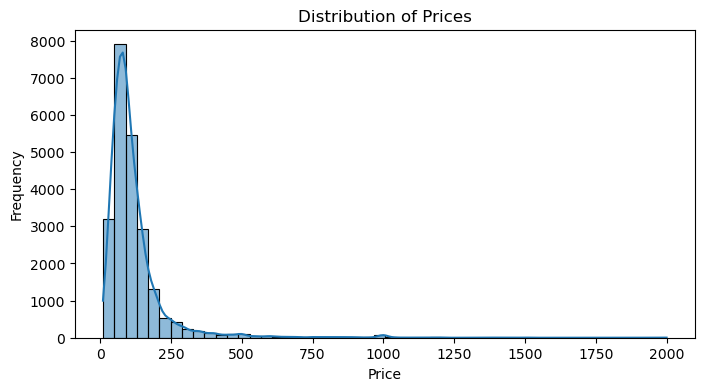

In [33]:
# Visualizing the Price Distribution
plt.figure(figsize=(8, 4))
sns.histplot(listings_df['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

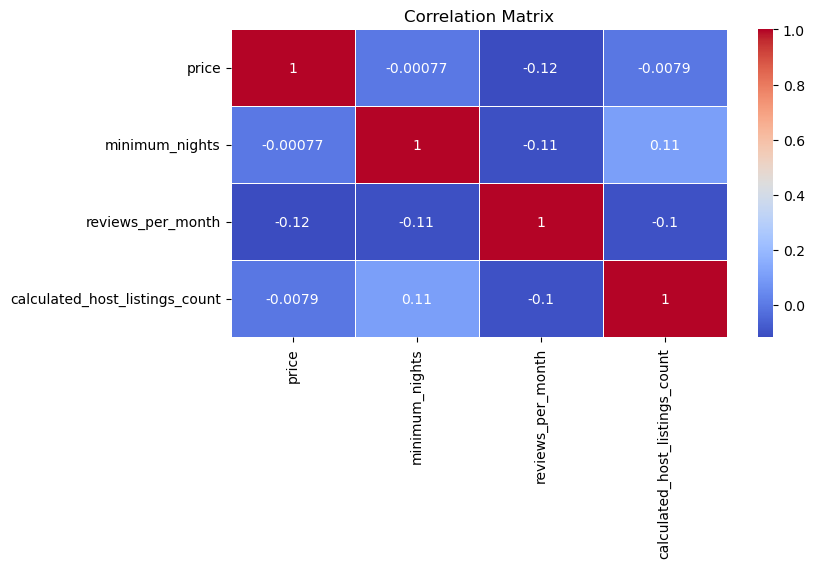

In [34]:
# Compute the correlation matrix
correlation_matrix = listings_df_num_columns.corr()
correlation_matrix

# Visualize the correlation matrix
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

__Summary of correlations:__
* __Most correlations are weak or very weak, indicating that there are no strong linear relationships between the key variables.__
* The strongest correlation is between number_of_reviews and reviews_per_month (0.625), which makes intuitive sense as more reviews overall should generally correlate with more reviews per month.
* Price appears to be relatively independent of other variables, suggesting that factors not captured in these specific features might be driving price variability.
* The weak correlations suggest that more complex, non-linear relationships might exist, which could be explored with further analysis or advanced modeling techniques.

<a name='modelling'></a>

<font color = '#C04000'>
    
# **5. Modelling** </font>

<a name='normalizing_data'></a>

<font color = '#C04000'>

## **5.1. Normalizing Data**

In [35]:
# Selecting the numerical variables of our interest to apply K-means
listings_df_kmeans_columns = listings_df[['price', 'minimum_nights', 'reviews_per_month', 'calculated_host_listings_count']]

In [36]:
# Knowing that StandardScaler is less sensitive to outliers we will apply this method to normalize the data
listings_df_scaled = StandardScaler().fit_transform(listings_df_kmeans_columns)
listings_df_scaled = pd.DataFrame(listings_df_scaled)
listings_df_scaled

,0,1,2,3
0,-0.740147,-0.236270,-0.069745,0.240777
1,-0.723783,-0.236270,0.136401,1.944684
2,-0.371956,-0.099665,0.205117,-0.406276
3,-0.682873,-0.236270,1.675629,-0.276865
4,-0.658327,-0.167967,-0.708800,-0.104318
...,...,...,...,...
22901,-0.216498,-0.167967,1.613785,-0.406276
22902,-0.461958,-0.236270,-0.165947,0.154504
22903,-0.208316,-0.099665,-0.165947,0.003524
22904,-0.494686,-0.236270,5.296938,-0.363139


<a name='clusters'></a>

<font color = '#C04000'>

## **5.2. Identifying the right number of clusters**

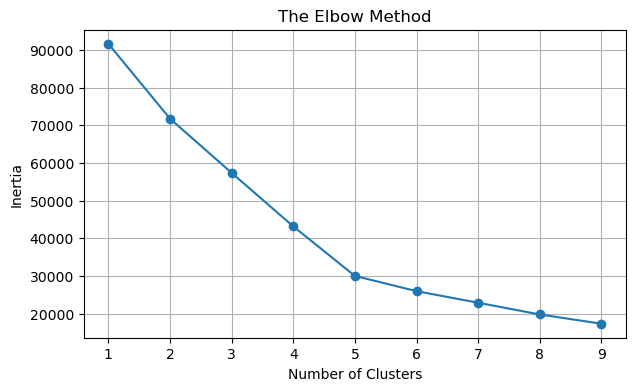

In [37]:
# Applying the Elbow Method
ks=range(1,10)
inertias=[]
for k in ks:
    model=KMeans(n_clusters=k).fit(listings_df_scaled)
    inertias.append(model.inertia_)

# Generate the elbow plot
fig=plt.subplots(figsize=(7,4))
plt.plot(ks, inertias, 'o-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.grid(True)
plt.show()

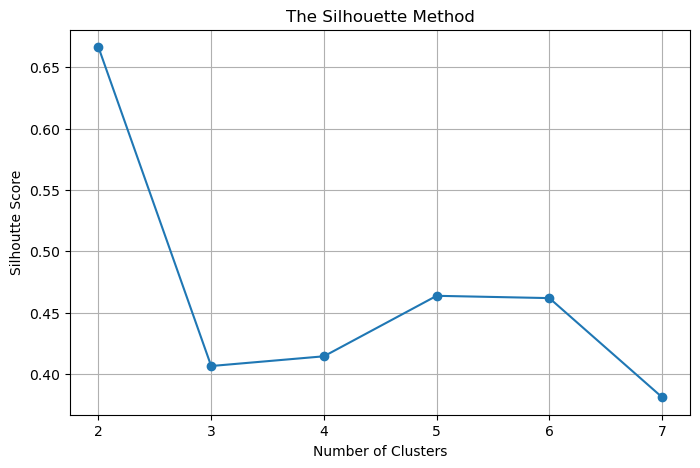

In [38]:
# Applying the Silhouette Method
silhouettes=[]
clusters=range(2,8)
for i in clusters:
    model_sil=KMeans(n_clusters=i, random_state=100).fit(listings_df_scaled)
    silhouettes.append(ss(listings_df_scaled, model_sil.labels_))

plt.figure(figsize=(8,5))
plt.plot(clusters,silhouettes, 'o-')
plt.title('The Silhouette Method')
plt.xlabel("Number of Clusters")
plt.xticks(clusters)
plt.ylabel("Silhoutte Score")
plt.grid(True)
plt.show()

From the plots we can verify that:
- __`Elbow Method:`__ Looking for the "elbow" point in the plot where the inertia starts to decrease more slowly is __5__.
- __`Silhouette Method:`__ After 2, the number of clusters that maximizes the average silhouette score is also __5__. <br>
So we decided to choose the number of clusters __`k=5`__.

<a name='kmeans'></a>

<font color = '#C04000'>

## **5.3. Training the model with K-Means**

Creating a KMeans instance called `model_listings_k5` using `KMeans()` and set `n_clusters` as 5, `random_state` as 30. Then, fit the instance to your data (a copy of the original dataframe normalized and named as `listings_df_scaled`.

In [39]:
model_listings_k5 = KMeans(n_clusters = 5, random_state = 30).fit(listings_df_scaled)

In [40]:
# Creating a new column in the dataframe named label, which will store the cluster number that each observation belongs to
listings_df_kmeans_columns['label_kmeans'] = model_listings_k5.labels_
centroids = model_listings_k5.cluster_centers_

In [41]:
# Finding the centroid of the new clusters
listings_df_kmeans_columns.groupby(['label_kmeans']).mean().transpose()

label_kmeans,0,1,2,3,4
price,651.686994,106.246679,95.840489,107.329135,133.973913
minimum_nights,2.962428,3.915725,2.099790,12.662469,268.913043
reviews_per_month,0.503743,0.626698,3.355536,0.540353,0.539783
calculated_host_listings_count,12.299133,9.763432,11.043777,196.512175,6.847826


In [42]:
listings_df_kmeans_columns['label_kmeans'].value_counts()

label_kmeans
1    15746
2     5231
3     1191
0      692
4       46
Name: count, dtype: int64

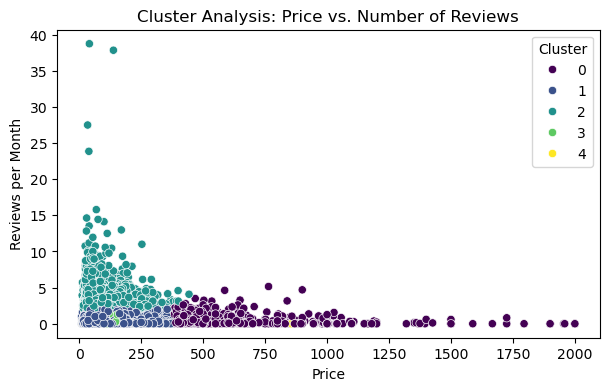

In [43]:
# Scatter Plot to visualize Price vs. Number of Reviews by Cluster
plt.figure(figsize=(7, 4))
sns.scatterplot(data=listings_df_kmeans_columns, x='price', y='reviews_per_month', hue='label_kmeans', palette='viridis')
plt.title('Cluster Analysis: Price vs. Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Reviews per Month')
plt.legend(title='Cluster')
plt.show()

In [44]:
cluster0 = listings_df_kmeans_columns[listings_df_kmeans_columns['label_kmeans'] == 0] #we want row "0" from label column
cluster1 = listings_df_kmeans_columns[listings_df_kmeans_columns['label_kmeans'] == 1] #we want row "1" from label column
cluster2 = listings_df_kmeans_columns[listings_df_kmeans_columns['label_kmeans'] == 2] #we want row "2" from label column
cluster3 = listings_df_kmeans_columns[listings_df_kmeans_columns['label_kmeans'] == 3] #we want row "3" from label column
cluster4 = listings_df_kmeans_columns[listings_df_kmeans_columns['label_kmeans'] == 4] #we want row "4" from label column

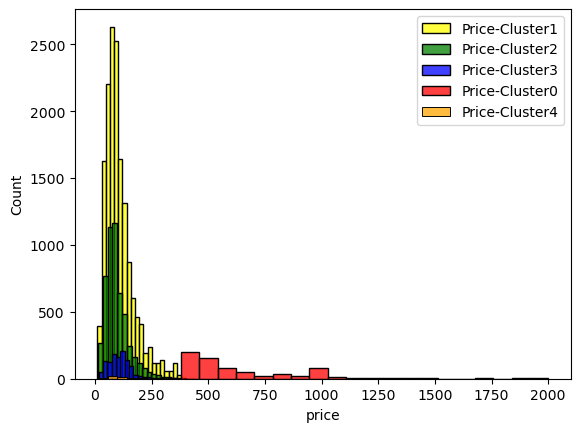

In [45]:
sns.histplot(cluster1['price'], color = 'yellow', label = 'Price-Cluster1', bins = 20)
sns.histplot(cluster2['price'], color = 'green', label = 'Price-Cluster2', bins = 20)
sns.histplot(cluster3['price'], color = 'blue', label = 'Price-Cluster3', bins = 20)
sns.histplot(cluster0['price'], color = 'red', label = 'Price-Cluster0', bins = 20)
sns.histplot(cluster4['price'], color = 'orange', label = 'Price-Cluster4', bins = 20)
plt.legend()

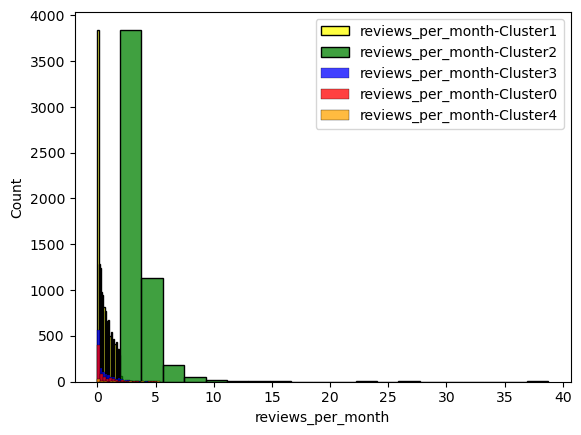

In [46]:
sns.histplot(cluster1['reviews_per_month'], color = 'yellow', label = 'reviews_per_month-Cluster1', bins = 20)
sns.histplot(cluster2['reviews_per_month'], color = 'green', label = 'reviews_per_month-Cluster2', bins = 20)
sns.histplot(cluster3['reviews_per_month'], color = 'blue', label = 'reviews_per_month-Cluster3', bins = 20)
sns.histplot(cluster0['reviews_per_month'], color = 'red', label = 'reviews_per_month-Cluster0', bins = 20)
sns.histplot(cluster4['reviews_per_month'], color = 'orange', label = 'reviews_per_month-Cluster4', bins = 20)
plt.legend()

<a name='KMeans_after_PCA'></a>

<font color = '#C0400'>

## **5.4. Applying K-means after performing PCA**

In [47]:
# Selecting the numerical variables of our interest to apply PCA
listings_df_pca_columns = listings_df[['price', 'minimum_nights', 'reviews_per_month', 'calculated_host_listings_count']]

In [48]:
# Knowing that StandardScaler is less sensitive to outliers we will apply this method to normalize the data
listings_df_scaled = StandardScaler().fit_transform(listings_df_pca_columns)
listings_df_scaled = pd.DataFrame(listings_df_scaled)

In [49]:
# Performing and fitting the PCA model to the scaled dataset
pca=PCA()
pca.fit(listings_df_scaled)

PCA()

In [50]:
# Obtaining the proportion of the scaled dataset variance explained by a single principal component
pca.explained_variance_ratio_

array([0.30729123, 0.26106776, 0.22322927, 0.20841174])

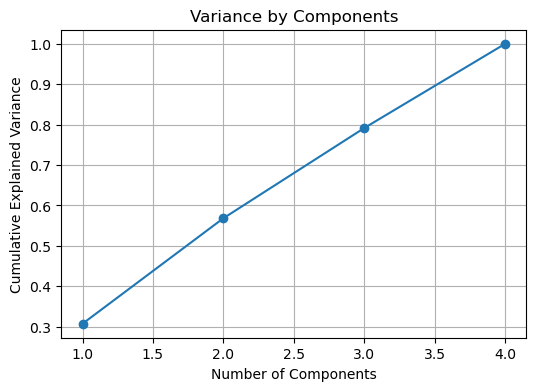

In [51]:
# Plotting to decide how many features we are going to keep
plt.figure(figsize=(6,4))
plt.plot(range(1,5), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

From the plot, we understand that:
* 3 Components: Since the first three components explain about 80% of the variance, which is often considered a good balance between complexity and information retention, using three components could be a reasonable choice. It captures most of the variability in the data while reducing dimensionality.
* 4 Components: Using four components explains 100% of the variance but does not provide the benefit of dimensionality reduction.

We decided that the optimal __number of components__ in PCA that involves a balance between preserving enough information from the original dataset while reducing dimensionality is __3__.

In [52]:
# Performing PCA with dimensionality reduction (Number of Components = 4 and Cumulative Explained Variance = 100%)
pca=PCA(n_components=3)
pca.fit(listings_df_scaled)

PCA(n_components=3)

In [53]:
# Transforming the scaled dataset into the 3-dimensional space
scores_pca=pca.transform(listings_df_scaled)
scores_pca

array([[ 0.1787155 , -0.57863598, -0.31422663],
       [-0.56080912, -1.32508197, -1.50656349],
       [ 0.49514097, -0.14420644,  0.22841585],
       ...,
       [ 0.00966243, -0.08496917, -0.06892325],
       [ 3.72976676, -1.57279745,  0.17075372],
       [ 0.23107225,  0.45905289,  0.12507451]])

In [54]:
# Appling K-means with PCA (in order to cluster the data in a lower-dimensional space)
model_kmeans_pca = KMeans(n_clusters=5, random_state=30).fit(scores_pca)

In [55]:
# Visualizing K-means with PCA
listings_df_pca_columns[['Component1', 'Component2', 'Component 3']] = scores_pca
listings_df_pca_columns['label_pca_kmeans'] = model_kmeans_pca.labels_
centroids_pca_kmeans = model_kmeans_pca.cluster_centers_

In [56]:
# Display the DataFrame to visualize the clusters
listings_df_pca_columns.head()

,price,minimum_nights,reviews_per_month,calculated_host_listings_count,Component1,Component2,Component 3,label_pca_kmeans
id,,,,,,,,
935509480248268779,30.0,1,1.14,31,0.178716,-0.578636,-0.314227,0
1033186766563842755,32.0,1,1.44,110,-0.560809,-1.325082,-1.506563,1
955103410770875754,75.0,3,1.54,1,0.495141,-0.144206,0.228416,3
790314265525149124,37.0,1,3.68,7,1.502848,-0.787017,0.069418,3
28040202,40.0,2,0.21,15,-0.101875,-0.225265,-0.034558,0


In [57]:
listings_df_pca_columns['label_pca_kmeans'].value_counts()

label_pca_kmeans
0    14872
3     6060
1     1270
4      658
2       46
Name: count, dtype: int64

In [58]:
cluster_summary = listings_df_pca_columns.groupby('label_pca_kmeans').mean()
cluster_summary

,price,minimum_nights,reviews_per_month,calculated_host_listings_count,Component1,Component2,Component 3
label_pca_kmeans,,,,,,,
0,113.958661,4.023332,0.601846,10.060584,-0.133723,0.173777,0.122624
1,103.269921,12.158268,0.522449,190.392913,-2.399793,-1.691511,-2.206126
2,133.973913,268.913043,0.539783,6.847826,-9.629199,-6.283473,13.052637
3,81.000627,2.076733,3.057888,9.091584,1.070147,-0.433855,0.073084
4,663.052280,2.904255,0.407264,11.469605,-1.528392,3.772049,-0.099088


* Based on the Silhouette Score results, we can check that __K-means algorithm performed better__ than K-means after PCA.

<a name='DBSCAN'></a>

<font color = '#C0400'>

## **5.5. Applying DBSCAN**

Unlike K-Means, we do not need to pre-define the number of clusters before applying the algorithm. However, in order not to have misleading results afterwards, defining the best __`eps`__ and __`min_samples`__ values below is essential.

To apply the DBSCAN model, first, we need to obtain its 2 parameters: Min_Samples and Epsilon (Eps):
- __`Min_Samples`__ - Generally 2* Data dimension, since our data has 4 dimensions then 2*4 columns = 8;
- __`Epsilon (eps)`__ - We have to calculate the distance between each point to its closest neighbor using Nearest Neighbours. After that, sort them and plot, finaly we identify the maximum value at the curvature of the graph, which will define our optimum __`eps`__.

In [59]:
# Selecting the numerical variables of our interest to apply DBSCAN
listings_df_dbscan_columns = listings_df[['price', 'minimum_nights', 'reviews_per_month', 'calculated_host_listings_count']]

In [60]:
# Knowing that StandardScaler is less sensitive to outliers we will apply this method to normalize the data
listings_df_scaled = StandardScaler().fit_transform(listings_df_dbscan_columns)
listings_df_scaled = pd.DataFrame(listings_df_scaled)

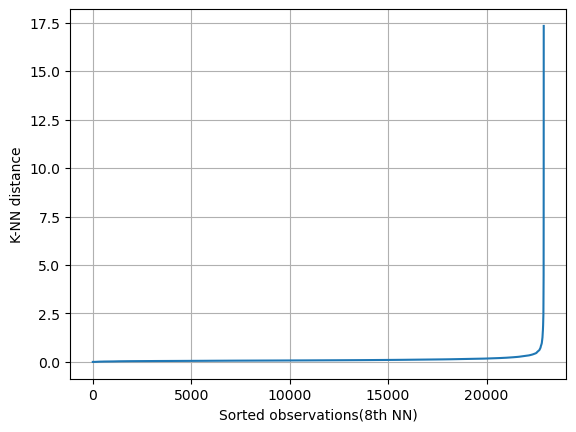

In [61]:
nbrs=NearestNeighbors(n_neighbors=9).fit(listings_df_scaled)
dist, ind= nbrs.kneighbors(listings_df_scaled)
sort_dist= np.sort(dist, axis=0)
k_dist=sort_dist[:, 8]
plt.plot(k_dist)
plt.ylabel("K-NN distance")
plt.xlabel("Sorted observations(8th NN)") # using the same as min_samples
plt.grid(True)
plt.show()

From the plot we can check:
- The value for our __`eps`__ should be greater or equal to __2.0__.

In [62]:
# Defining the variables to be applied in our get_scores_and_labels() function
epsilons = np.linspace(0.5, 2.5, num=10) 
min_samples = np.arange(12, 14, step=2)
combinations = list(itertools.product(epsilons, min_samples))
N = len(combinations)

In [63]:
def get_scores_and_labels(combinations, df):
    scores = []
    all_labels_list = []
    
    for i, (eps, num_samples) in enumerate(combinations):
        dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(df)
        labels = dbscan_cluster_model.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set)
        if -1 in labels_set:
            num_clusters -= 1
    
        if (num_clusters < 3) or (num_clusters > 5):
            scores.append(-10)
            all_labels_list.append('bad')
            c = (eps, num_samples)
            print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
            continue
    
        scores.append(ss(df, labels))
        all_labels_list.append(labels)
        print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

    best_index = np.argmax(scores)
    best_parameters = combinations[best_index]
    best_labels = all_labels_list[best_index]
    best_score = scores[best_index]

    return {'best_epsilon': best_parameters[0],
            'best_min_samples': best_parameters[1], 
            'best_labels': best_labels,
            'best_score': best_score}

In [64]:
best_values = get_scores_and_labels(combinations, listings_df_scaled)

Combination (0.5, 12) on iteration 1 of 10 has 11 clusters. Moving on
Combination (0.7222222222222222, 12) on iteration 2 of 10 has 9 clusters. Moving on
Index: 2, Score: 0.6858278829842159, Labels: [0 0 0 ... 0 0 0], NumClusters: 5
Index: 3, Score: 0.68597196666197, Labels: [0 0 0 ... 0 0 0], NumClusters: 5
Index: 4, Score: 0.6887048663751548, Labels: [0 0 0 ... 0 0 0], NumClusters: 5
Index: 5, Score: 0.6889848786141837, Labels: [0 0 0 ... 0 0 0], NumClusters: 5
Index: 6, Score: 0.6908694531785264, Labels: [0 0 0 ... 0 0 0], NumClusters: 4
Index: 7, Score: 0.6905814416465758, Labels: [0 0 0 ... 0 0 0], NumClusters: 4
Index: 8, Score: 0.6895963554788345, Labels: [0 0 0 ... 0 0 0], NumClusters: 3
Combination (2.5, 12) on iteration 10 of 10 has 2 clusters. Moving on


In [65]:
best_values

{'best_epsilon': 1.8333333333333333,
 'best_min_samples': 12,
 'best_labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'best_score': 0.6908694531785264}

In [66]:
listings_df_dbscan_columns['label_dbscan'] = best_values['best_labels']
listings_df_dbscan_columns['label_dbscan'].value_counts()

label_dbscan
 0    22560
 1      289
-1       23
 2       19
 3       15
Name: count, dtype: int64

In [67]:
# Checking the performance of the 3 methods applied with Silhouette Score
sil_scores = {
    "K-means": ss(listings_df_scaled, listings_df_kmeans_columns['label_kmeans']),
    "K-means with pca ": ss(listings_df_scaled, listings_df_pca_columns['label_pca_kmeans']),
    "DBSCAN": ss(listings_df_scaled, listings_df_dbscan_columns['label_dbscan']),
}
sil_scores

{'K-means': 0.4646801803341521,
 'K-means with pca ': 0.41394902739710115,
 'DBSCAN': 0.6908694531785264}

* Based on the clustering performance metrics, DBSCAN achieved the highest Silhouette Score of 0.6909, outperforming both K-means (0.4647) and K-means with PCA (0.4139). Despite this superior performance, __the data distribution resulting from DBSCAN was highly imbalanced__, with one cluster containing 22,560 data points, and the remaining clusters containing very few points (289, 23, 19, and 15 points respectively). __This indicates that while DBSCAN effectively separated some outliers, it failed to produce well-distributed clusters for meaningful analysis.__
+ In contrast, __K-means provided a more balanced distribution across its clusters__. This balanced clustering allows for a clearer interpretation of the dataset’s characteristics and insights. Consequently, __we decided to proceed with K-means clustering for further analysis, as it offers a more practical and structured approach for our objectives__.

<a name='analyzing_further'></a>

<font color = '#C0400'>
    
# **6. Analyzing Further** </font>

<a name='analyzing_kmeans'></a>

<font color = '#C0400'>
    
## **6.1. K-Means Clusters** </font>

In [68]:
# Finding the centroid of the new clusters
listings_df_kmeans_columns.groupby(['label_kmeans']).mean().transpose()

label_kmeans,0,1,2,3,4
price,651.686994,106.246679,95.840489,107.329135,133.973913
minimum_nights,2.962428,3.915725,2.099790,12.662469,268.913043
reviews_per_month,0.503743,0.626698,3.355536,0.540353,0.539783
calculated_host_listings_count,12.299133,9.763432,11.043777,196.512175,6.847826


__`Cluster 0 - Luxury Rentals:`__
* Size: 692 data points.
* Characteristics:
  * High Average Prices: The average price is 651.69.
  * Moderate Minimum Nights: These listings tend to have moderate minimum night requirements, averaging around 2.96 nights.
  * Quite Low Reviews per Month: The reviews per month are quite low, averaging 0.50, indicating that __these listings are not frequently rented.__ 
  * Moderate Host Listings Count: The calculated host listings count is moderate, with hosts managing around 12.30 listings on average.

* ___Implications:__ This cluster likely represents high-end, luxury properties. __The high prices and low rental frequency suggest these listings cater to a more exclusive market, possibly luxury travelers or premium long-term stays.___

__`Cluster 1 - Standard Rentals:`__
* Size: This is the largest cluster with 15,746 data points.
* Characteristics:
  * Moderate Average Prices: The average price for listings in this cluster is 106.25, which is moderate compared to other clusters.
  * High Minimum Nights: The minimum nights required are relatively high, averaging around 3.92 nights.
  * Moderate Reviews per Month: Reviews per month are moderate at 0.63, indicating a balanced rental frequency.
  * Moderate Host Listings Count: The average calculated host listings count is 9.76, suggesting that hosts manage a moderate number of listings.
* ___Implications:__ This cluster likely represents the __most common type of listings in the dataset__. With moderate pricing and balanced rental frequency, these listings cater to a broad audience. The higher minimum nights suggest they might target both short-term and medium-term renters. Being the largest cluster, it encompasses a wide variety of typical rental properties that are neither too exclusive nor too budget-oriented._

__`Cluster 2 - Budget-Friendly Rentals:`__
* Size: Consists of 5,231 data points.
* Characteristics:
  * Low Average Prices: Listings in this cluster have an average price of 95.84, which is relatively low. 
  * Low Minimum Nights: The minimum night requirement is also low, averaging around 2.10 nights. 
  * High Reviews per Month: This cluster stands out with a high average number of reviews per month, at 3.36, indicating that these listings are frequently rented. 
  * Moderate Host Listings Count: The average calculated host listings count is 11.04, which is moderate. 
* ___Implications:__ This cluster likely represents __budget-friendly listings that are popular among short-term renters and tourists__. __The high rental frequency suggests that these properties are in high demand__, possibly due to their affordability. The low minimum nights make them attractive for short stays, and the moderate host listings count indicates that these listings are managed by hosts with a fair number of properties, possibly aiming at high turnover and occupancy rates._

__`Cluster 3 - Corporate Housing:`__
* Size: Includes 1,191 data points. 
* Characteristics:
  * Moderate Average Prices: Listings in this cluster have a moderate average price of 107.33. 
  * Very High Minimum Nights: However, the average minimum nights required are very high at 12.66, suggesting long-term stay requirements. 
  * Moderate Reviews per Month: The reviews per month are moderate at 0.54, indicating a moderate rental frequency. 
  * Extremely High Host Listings Count:The calculated host listings count is extremely high, with hosts managing around 196.51 listings on average. 
* ___Implications:__ This cluster likely represents __listings managed by large property managers or companies.__ The high minimum stay requirements and moderate rental frequency suggest that these properties target __long-term renters or corporate clients__. The very high host listings count indicates that these listings are part of large portfolios managed by professional hosts, possibly focusing on business travelers, expatriates, or extended stays._

__`Cluster 4 - Extended Stay Rentals:`__
* Size: 46 data points, is the smallest cluster.
* Characteristics:
  * Moderate Average Prices: Listings in this cluster have a moderate average price of 133.97. 
  * Extremely High Minimum Nights: However, the average minimum nights required are extremely high at 268.91, indicating these are likely long-term rentals. 
  * Low Reviews per Month: The reviews per month are low, averaging 0.54, suggesting infrequent rentals. 
  * Low Host Listings Count: The calculated host listings count is relatively low, with an average of 6.85 listings per host.
* ___Implications:__ This cluster likely represents very specific long-term rentals. __The extremely high minimum nights suggest that these listings cater to niche markets such as expatriates, long-term travelers, or corporate housing.__ The low rental frequency aligns with the long-term nature of these stays._

<a name='analyzing_categorical'></a>

<font color = '#C0400'>
    
## **6.2. K-Means with Categorical Variables** </font>

In [69]:
# Considering the columns 'host_info', 'neighbourhood_group', 'neighbourhood', 'room_type' with categorical variables to analyze
listings_df_merge=pd.merge(listings_df[['host_info', 'neighbourhood_group', 'neighbourhood', 'room_type']], listings_df_kmeans_columns['label_kmeans'], on='id' , how="outer")
listings_df_merge.head()

,host_info,neighbourhood_group,neighbourhood,room_type,label_kmeans
id,,,,,
935509480248268779,Vagner (236955701),Lisboa,Arroios,Private room,1
1033186766563842755,Flavio (185898036),Lisboa,Arroios,Private room,3
955103410770875754,Luís (531095694),Lisboa,Estrela,Entire home/apt,1
790314265525149124,Mariana (453929593),Lisboa,Arroios,Private room,2
28040202,Heleno & Silva (32743314),Lisboa,Arroios,Private room,1


In [70]:
def summarize_top_10(df, cluster_label, column):
    # Filter the DataFrame for the specified cluster
    cluster_df = df[df['label_kmeans'] == cluster_label]
    
    # Get the top 10 values for the specified column
    top_10 = cluster_df[column].value_counts().head(10)
    
    return top_10

# Summarize for each cluster
clusters = listings_df_merge['label_kmeans'].unique()
categorical_columns = ['host_info', 'neighbourhood', 'neighbourhood_group', 'room_type']

# Dictionary to store the summary
summary = {cluster: {col: summarize_top_10(listings_df_merge, cluster, col) for col in categorical_columns} for cluster in clusters}

# Print the summary
for cluster in summary:
    print(f"Cluster {cluster} Summary:")
    for col in categorical_columns:
        print(f"Top 10 {col}:")
        print(summary[cluster][col])
        print("\n")

Cluster 1 Summary:
Top 10 host_info:
host_info
Luís (186448151)                    94
Albertino (2372087)                 55
Travelservices (440843690)          54
Alojoeste (331391493)               50
Holidays In Ericeira (170772126)    49
Maria De Jesus (17638903)           48
Filipe (222858515)                  46
LisBeyond (15900664)                45
Homing (465505052)                  44
Olala Homes (129000409)             43
Name: count, dtype: int64


Top 10 neighbourhood:
neighbourhood
Santa Maria Maior                                    1620
Arroios                                              1412
Misericrdia                                          1340
Cascais e Estoril                                    1207
Santo Antnio                                          799
So Vicente                                            721
Ericeira                                              701
Estrela                                               612
S.Maria, S.Miguel, S.Martinho, S.Pe

__`Cluster 0 - Luxury Rentals:`__
* Characteristics:
  * High Prices: Average price significantly higher than other clusters.
  * Moderate Minimum Nights: Minimum nights are reasonable, indicating flexibility for guests.
  * Low Rental Frequency: Low reviews per month suggest these properties are rented less frequently, possibly due to high prices.
* Top Hosts:
  * RoomPicks, OhMyGuest, Portugal, CadenzaLux: These hosts specialize in high-end properties.
* Top Neighborhoods:
  * Cascais e Estoril, Santo António, Santa Maria Maior, Colares: Premium locations known for luxury accommodations.
* Top Neighborhood Groups:
  * Lisboa, Cascais, Sintra, Mafra: These groups represent the high-end areas within the region.
* Room Types:
  * Predominantly entire homes/apartments.
* Detailed Insights:
  * Guest Expectations: Guests staying in luxury rentals expect premium amenities such as high-end furnishings, exclusive services (e.g., concierge, private chefs), and unique experiences.
* Property Features: Properties in this cluster should focus on standout features such as ocean views, private pools, high-security systems, and proximity to upscale attractions.
* Marketing Strategy:
  * Target Audience: Affluent travelers, business executives, celebrities, and special occasion renters.
  * Channels: Utilize high-end travel platforms, luxury travel agencies, and exclusive partnerships with brands targeting wealthy clientele.
  * Promotions: Offer personalized packages, special events, and unique experiences to attract high-net-worth individuals.
* Opportunities:
  * Upsell Services: Offering additional paid services like private tours, luxury car rentals, and personalized concierge services can enhance guest experiences and increase revenue.
  * Partnerships: Collaborate with luxury brands and local high-end businesses to create exclusive offers and experiences for guests.
  
__`Cluster 1 - Standard Rentals:`__
* Characteristics:
  * Moderate Prices: Balanced pricing suitable for a wide range of guests.
  * High Minimum Nights: Indicates a preference for slightly longer stays.
  * Balanced Rental Frequency: Steady number of reviews per month.
* Top Hosts:
  * Luís, Albertino, Travelservices, Alojoeste: Hosts with moderate property portfolios.
* Top Neighborhoods:
  * Santa Maria Maior, Arroios, Misericrdia, Cascais e Estoril: Popular, central neighborhoods with good accessibility.
* Top Neighborhood Groups:
  * Lisboa, Cascais, Sintra, Mafra: Central and well-connected areas appealing to a wide range of guests.
* Room Types:
  * Mix of entire homes/apartments and private rooms.
* Detailed Insights:
  * Guest Profile: Includes families, tourists, business travelers, and solo travelers looking for comfort and convenience.
  * Property Features: Should include essential amenities such as Wi-Fi, fully equipped kitchens, comfortable furnishings, and possibly workspaces for business travelers.
* Marketing Strategy:
  * Target Audience: Mid-range tourists, business travelers, and families.
  * Channels: Utilize mainstream travel platforms, social media, and travel blogs.
  * Promotions: Offer discounts for longer stays, family packages, and seasonal promotions to attract repeat bookings.
* Opportunities:
  * Enhanced Amenities: Investing in additional amenities such as fitness centers, business facilities, and child-friendly features can attract a broader audience.
  * Community Engagement: Promote local experiences and partnerships with local businesses to enhance guest stays and support the community.

__`Cluster 2 - Budget Rentals:`__
* Characteristics:
  * Low Prices: Affordable pricing attracts budget-conscious travelers.
  * Low Minimum Nights: Flexible stay options for short-term renters.
  * High Rental Frequency: High number of reviews per month indicates frequent bookings.
* Top Hosts:
  * Alexandra Pedro And Team, Sarah & Pedro, Patrícia, Flavio: Hosts focusing on budget-friendly properties.
* Top Neighborhoods:
  * Santa Maria Maior, Misericrdia, Arroios, So Vicente: Affordable neighborhoods with good accessibility to city attractions.
* Top Neighborhood Groups:
  * Lisboa, Sintra, Cascais, Oeiras: Accessible and budget-friendly areas.
* Room Types:
  * Predominantly entire homes/apartments and private rooms.
* Detailed Insights:
  * Guest Profile: Includes students, solo travelers, backpackers, and budget-conscious families.
  * Property Features: Basic yet comfortable amenities such as clean beds, Wi-Fi, shared kitchens, and laundry facilities.
* Marketing Strategy:
  * Target Audience: Budget travelers, students, and short-term renters.
  * Channels: Use budget travel platforms, hostel booking sites, and social media.
  * Promotions: Offer last-minute deals, referral discounts, and group booking discounts.
* Opportunities:
  * Cost-Effective Improvements: Small investments in cleanliness, security, and basic comfort can significantly improve guest satisfaction.
  * Volume Focus: Maximize occupancy rates through aggressive pricing strategies and promotions to maintain high rental frequency.

__`Cluster 3 - Corporate Housing:`__
* Characteristics:
  * Moderate Prices: Suitable for long-term business stays.
  * High Minimum Nights: Indicates a focus on long-term rentals.
  * Moderate Rental Frequency: Steady bookings, typical for corporate clients.
* Top Hosts:
  * Feels Like Home, Blueground, Ukio, Pedro: Large property management companies specializing in corporate housing.
* Top Neighborhoods:
  * Santo Antnio, Santa Maria Maior, Arroios, Avenidas Novas: Central neighborhoods with good business infrastructure.
* Top Neighborhood Groups:
  * Lisboa, Cascais, Sintra, Oeiras: Areas with strong business infrastructure and accessibility.
* Room Types:
  * Mostly entire homes/apartments.
* Detailed Insights:
  * Guest Profile: Includes business travelers, expatriates, and long-term corporate clients.
  * Property Features: Should include workspaces, high-speed internet, proximity to business districts, and long-term stay amenities (e.g., laundry facilities, fully equipped kitchens).
* Marketing Strategy:
  * Target Audience: Corporate clients, relocation companies, and business travelers.
  * Channels: Corporate housing platforms, business travel agencies, and direct corporate partnerships.
  * Promotions: Offer long-term stay discounts, corporate packages, and flexible booking options.
* Opportunities:
  * Corporate Partnerships: Establish relationships with companies and relocation services to secure long-term contracts.
  * Business Amenities: Invest in amenities like meeting rooms, business centers, and concierge services tailored to corporate clients.

__`Cluster 4 - Extended Stay Rentals:`__
* Characteristics:
  * Moderate Prices: Balanced pricing for long-term stays.
  * Extremely High Minimum Nights: Indicates a focus on very long-term rentals.
  * Low Rental Frequency: Low reviews per month due to long stay durations.
* Top Hosts:
  * Paulo Eduardo, Martinhal Hotels, Tiago, Pedro: Hosts specializing in long-term rentals.
* Top Neighborhoods:
  * Misericrdia, Santo Antnio, Arroios, Parque das Naes: Neighborhoods catering to long-term residents.
* Top Neighborhoods:
  * Misericrdia, Santo Antnio, Arroios, Parque das Naes: Neighborhoods catering to long-term residents.
* Room Types:
  * Predominantly entire homes/apartments.
* Detailed Insights:
  * Guest Profile: Includes expatriates, long-term travelers, and individuals in relocation.
  * Property Features: Should provide home-like amenities such as full kitchens, ample storage, comfortable living spaces, and community engagement opportunities.
* Marketing Strategy:
  * Target Audience: Expatriates, long-term travelers, and relocation clients.
  * Channels: Long-term rental platforms, relocation agencies, and international job boards.
  * Promotions: Offer flexible lease terms, relocation assistance, and comprehensive onboarding packages.
* Opportunities:
  * Community Building: Create a sense of community among long-term residents through events and social gatherings.
  * Relocation Services: Provide comprehensive support services for expatriates, including local orientation and settling-in assistance.
  
  
<u> __`General Conclusions:`__ </u>
* Market Segmentation: Clear differentiation between market segments allows for targeted strategies to maximize occupancy and revenue.
* Tailored Services: Understanding the specific needs of each cluster's target audience enables property managers to tailor services and amenities effectively.
* Marketing Optimization: Utilizing appropriate marketing channels and promotions can attract the right guests and improve booking rates.
* Investment Opportunities: Identifying popular neighborhoods and investing in properties that meet the cluster-specific demands can yield high returns.
* Guest Satisfaction: Enhancing guest experiences through thoughtful amenities and services tailored to each segment can improve satisfaction and encourage repeat bookings.

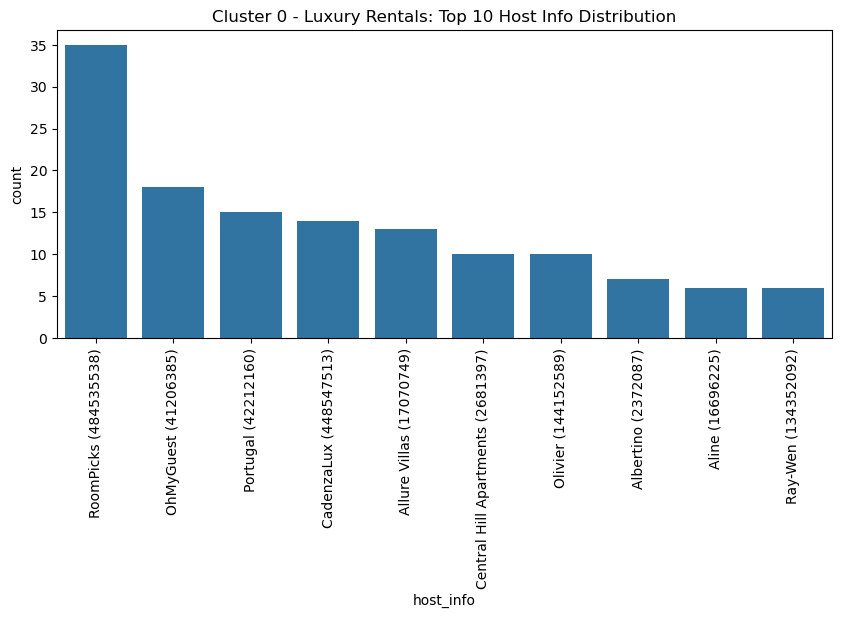

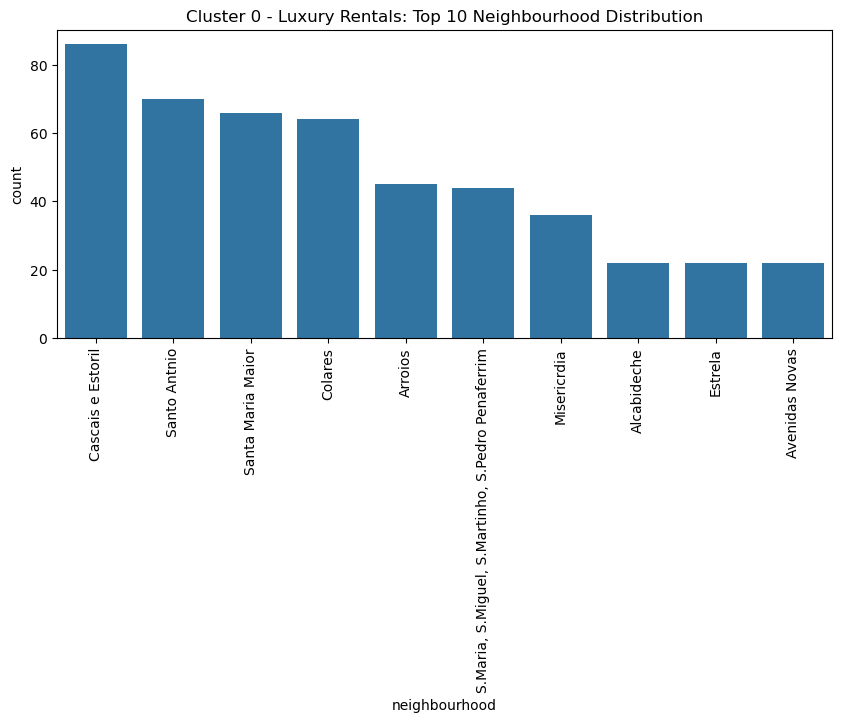

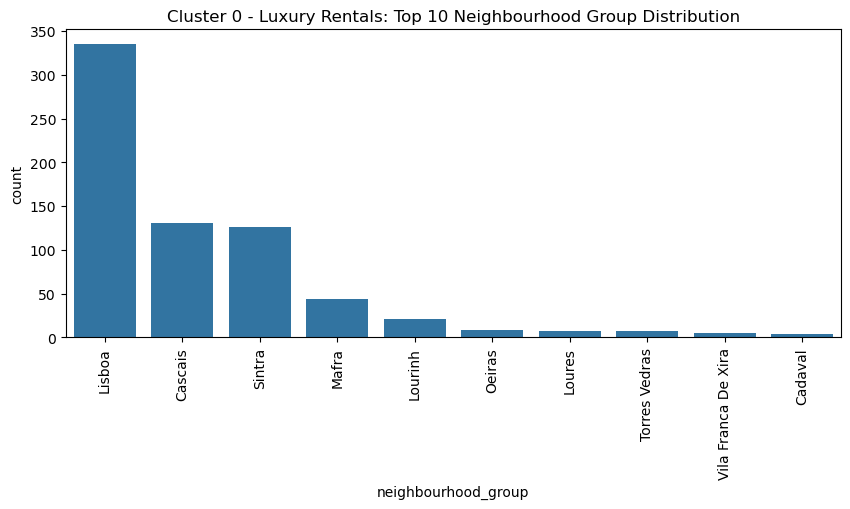

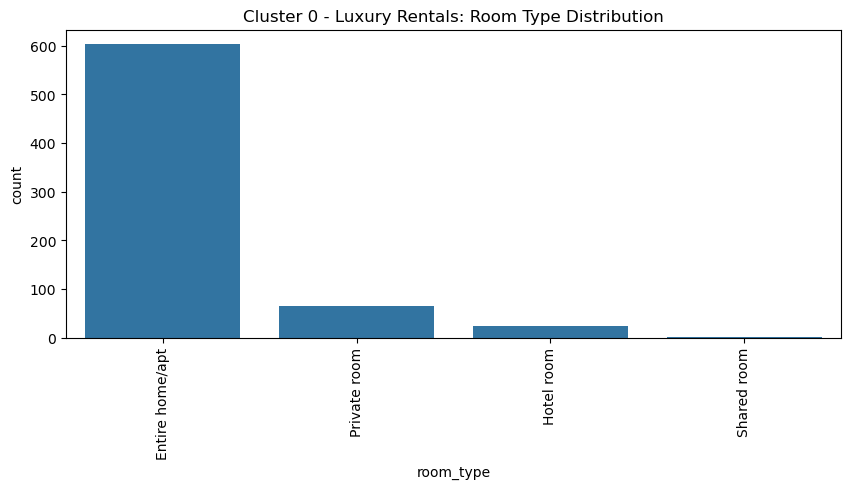

In [71]:
# Filter the DataFrame for Cluster 0
cluster_0_df = listings_df_merge[listings_df_merge['label_kmeans'] == 0]

# Top 10 'host_info' and 'neighbourhood'
top_10_host_info_0 = cluster_0_df['host_info'].value_counts().nlargest(10).index
top_10_neighbourhood_0 = cluster_0_df['neighbourhood'].value_counts().nlargest(10).index
top_10_neighbourhood_group_0 = cluster_0_df['neighbourhood_group'].value_counts().nlargest(10).index

# Countplot for top 10 host_info sorted in descending order
plt.figure(figsize=(10, 4))
sns.countplot(data=cluster_0_df[cluster_0_df['host_info'].isin(top_10_host_info_0)], x='host_info', order=top_10_host_info_0)
plt.title('Cluster 0 - Luxury Rentals: Top 10 Host Info Distribution')
plt.xticks(rotation=90)
plt.show()

# Countplot for top 10 neighbourhood sorted in descending order
plt.figure(figsize=(10, 4))
sns.countplot(data=cluster_0_df[cluster_0_df['neighbourhood'].isin(top_10_neighbourhood_0)], x='neighbourhood', order=top_10_neighbourhood_0)
plt.title('Cluster 0 - Luxury Rentals: Top 10 Neighbourhood Distribution')
plt.xticks(rotation=90)
plt.show()

# Countplot for top 10 neighbourhood_group sorted in descending order
plt.figure(figsize=(10, 4))
sns.countplot(data=cluster_0_df[cluster_0_df['neighbourhood_group'].isin(top_10_neighbourhood_group_0)], x='neighbourhood_group', order=top_10_neighbourhood_group_0)
plt.title('Cluster 0 - Luxury Rentals: Top 10 Neighbourhood Group Distribution')
plt.xticks(rotation=90)
plt.show()

# Countplot for room_type
plt.figure(figsize=(10, 4))
sns.countplot(data=cluster_0_df, x='room_type', order=cluster_0_df['room_type'].value_counts().index)
plt.title('Cluster 0 - Luxury Rentals: Room Type Distribution')
plt.xticks(rotation=90)
plt.show()

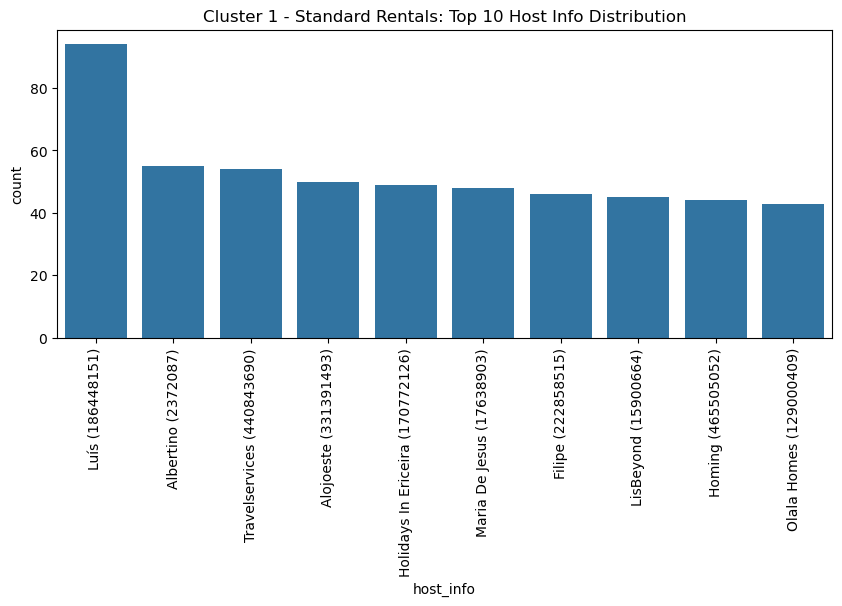

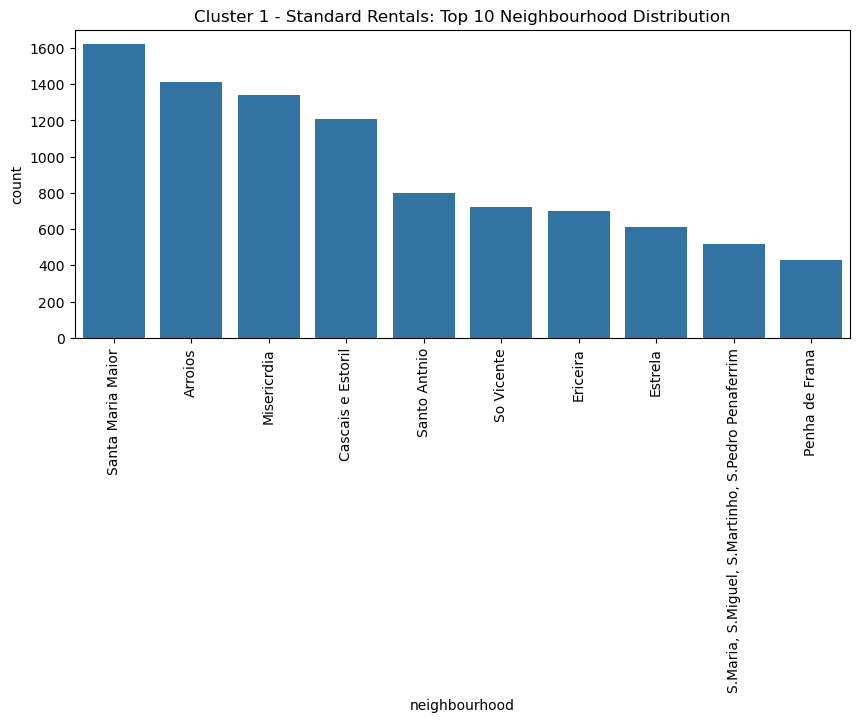

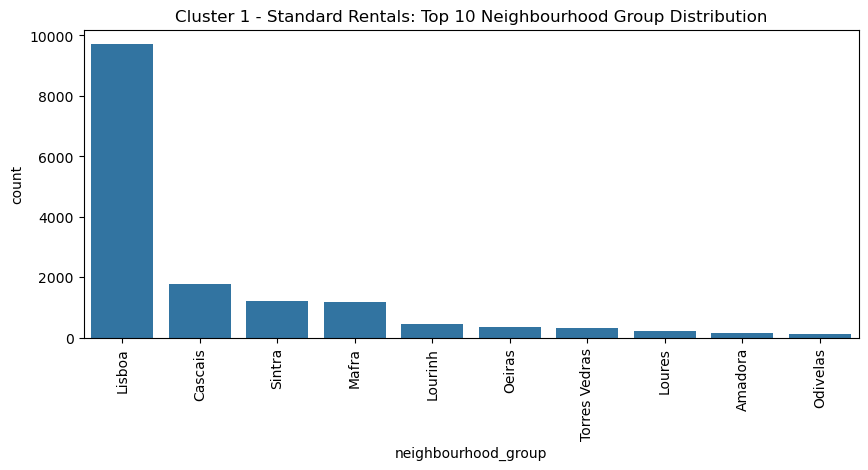

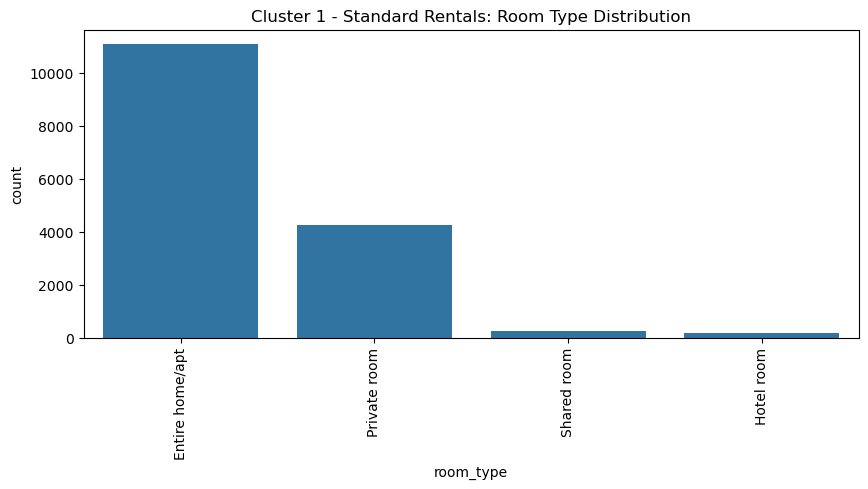

In [72]:
# Filter the DataFrame for Cluster 1
cluster_1_df = listings_df_merge[listings_df_merge['label_kmeans'] == 1]

# Top 10 'host_info' and 'neighbourhood'
top_10_host_info_1 = cluster_1_df['host_info'].value_counts().nlargest(10).index
top_10_neighbourhood_1 = cluster_1_df['neighbourhood'].value_counts().nlargest(10).index
top_10_neighbourhood_group_1 = cluster_1_df['neighbourhood_group'].value_counts().nlargest(10).index

# Countplot for top 10 host_info sorted in descending order
plt.figure(figsize=(10, 4))
sns.countplot(data=cluster_1_df[cluster_1_df['host_info'].isin(top_10_host_info_1)], x='host_info', order=top_10_host_info_1)
plt.title('Cluster 1 - Standard Rentals: Top 10 Host Info Distribution')
plt.xticks(rotation=90)
plt.show()

# Countplot for top 10 neighbourhood sorted in descending order
plt.figure(figsize=(10, 4))
sns.countplot(data=cluster_1_df[cluster_1_df['neighbourhood'].isin(top_10_neighbourhood_1)], x='neighbourhood', order=top_10_neighbourhood_1)
plt.title('Cluster 1 - Standard Rentals: Top 10 Neighbourhood Distribution')
plt.xticks(rotation=90)
plt.show()

# Countplot for top 10 neighbourhood_group sorted in descending order
plt.figure(figsize=(10, 4))
sns.countplot(data=cluster_1_df[cluster_1_df['neighbourhood_group'].isin(top_10_neighbourhood_group_1)], x='neighbourhood_group', order=top_10_neighbourhood_group_1)
plt.title('Cluster 1 - Standard Rentals: Top 10 Neighbourhood Group Distribution')
plt.xticks(rotation=90)
plt.show()

# Countplot for room_type
plt.figure(figsize=(10, 4))
sns.countplot(data=cluster_1_df, x='room_type', order=cluster_1_df['room_type'].value_counts().index)
plt.title('Cluster 1 - Standard Rentals: Room Type Distribution')
plt.xticks(rotation=90)
plt.show()

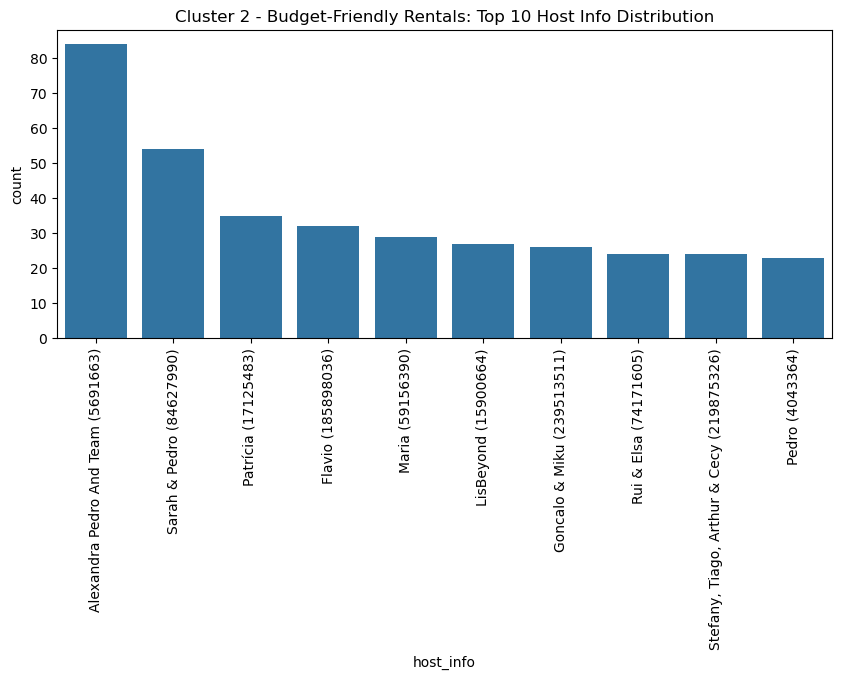

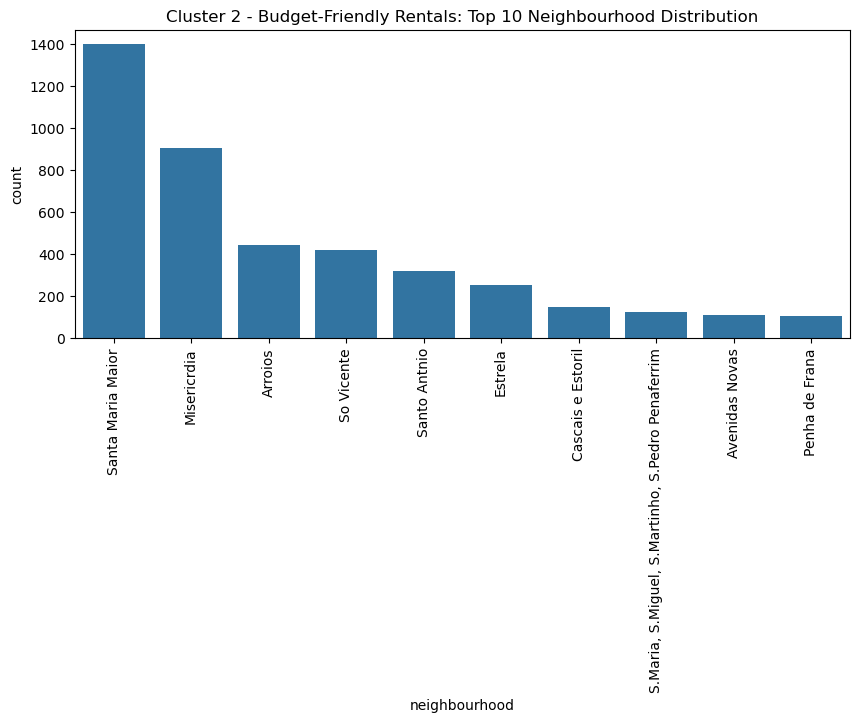

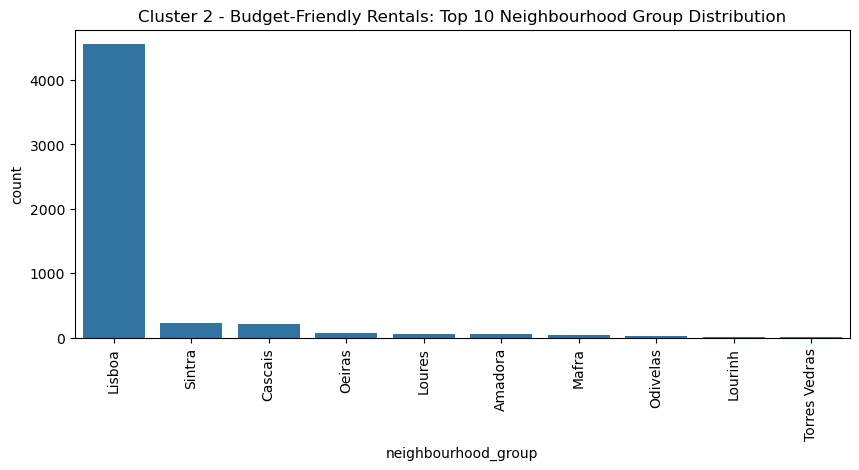

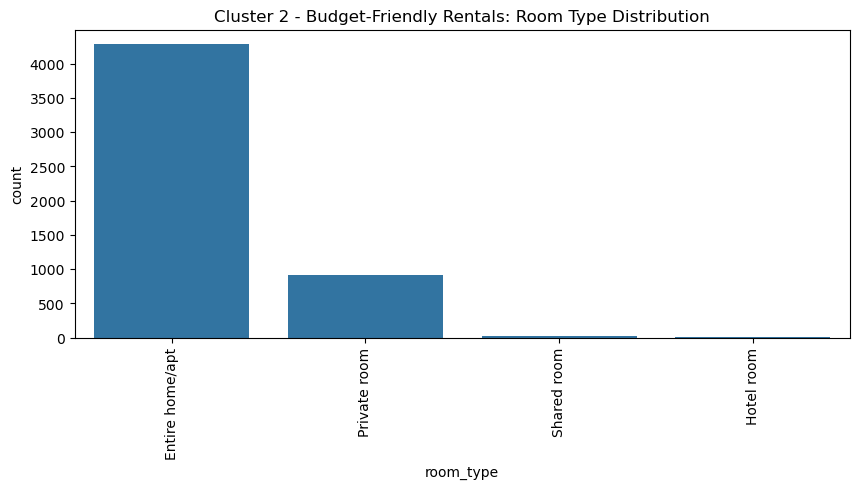

In [73]:
# Filter the DataFrame for Cluster 2
cluster_2_df = listings_df_merge[listings_df_merge['label_kmeans'] == 2]

# Top 10 'host_info' and 'neighbourhood'
top_10_host_info_2 = cluster_2_df['host_info'].value_counts().nlargest(10).index
top_10_neighbourhood_2 = cluster_2_df['neighbourhood'].value_counts().nlargest(10).index
top_10_neighbourhood_group_2 = cluster_2_df['neighbourhood_group'].value_counts().nlargest(10).index

# Countplot for top 10 host_info sorted in descending order
plt.figure(figsize=(10, 4))
sns.countplot(data=cluster_2_df[cluster_2_df['host_info'].isin(top_10_host_info_2)], x='host_info', order=top_10_host_info_2)
plt.title('Cluster 2 - Budget-Friendly Rentals: Top 10 Host Info Distribution')
plt.xticks(rotation=90)
plt.show()

# Countplot for top 10 neighbourhood sorted in descending order
plt.figure(figsize=(10, 4))
sns.countplot(data=cluster_2_df[cluster_2_df['neighbourhood'].isin(top_10_neighbourhood_2)], x='neighbourhood', order=top_10_neighbourhood_2)
plt.title('Cluster 2 - Budget-Friendly Rentals: Top 10 Neighbourhood Distribution')
plt.xticks(rotation=90)
plt.show()

# Countplot for top 10 neighbourhood_group sorted in descending order
plt.figure(figsize=(10, 4))
sns.countplot(data=cluster_2_df[cluster_2_df['neighbourhood_group'].isin(top_10_neighbourhood_group_2)], x='neighbourhood_group', order=top_10_neighbourhood_group_2)
plt.title('Cluster 2 - Budget-Friendly Rentals: Top 10 Neighbourhood Group Distribution')
plt.xticks(rotation=90)
plt.show()

# Countplot for room_type
plt.figure(figsize=(10, 4))
sns.countplot(data=cluster_2_df, x='room_type', order=cluster_2_df['room_type'].value_counts().index)
plt.title('Cluster 2 - Budget-Friendly Rentals: Room Type Distribution')
plt.xticks(rotation=90)
plt.show()

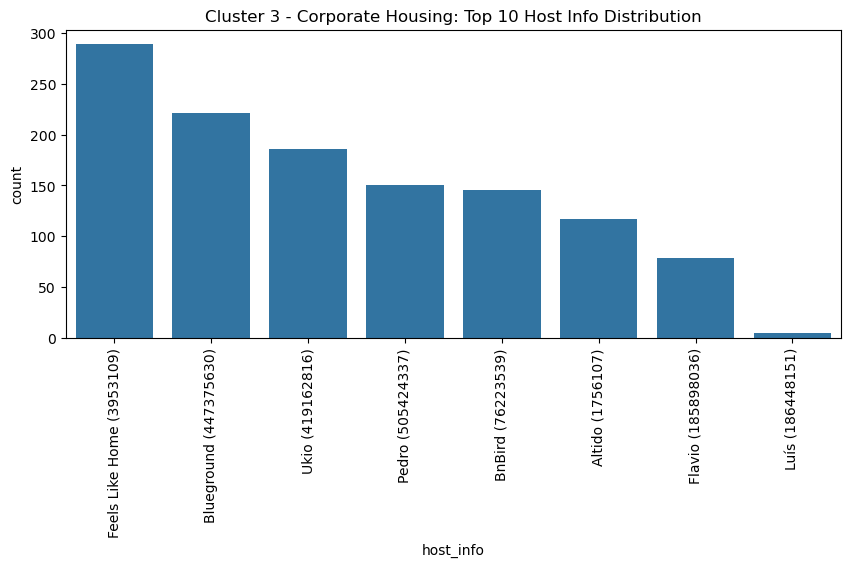

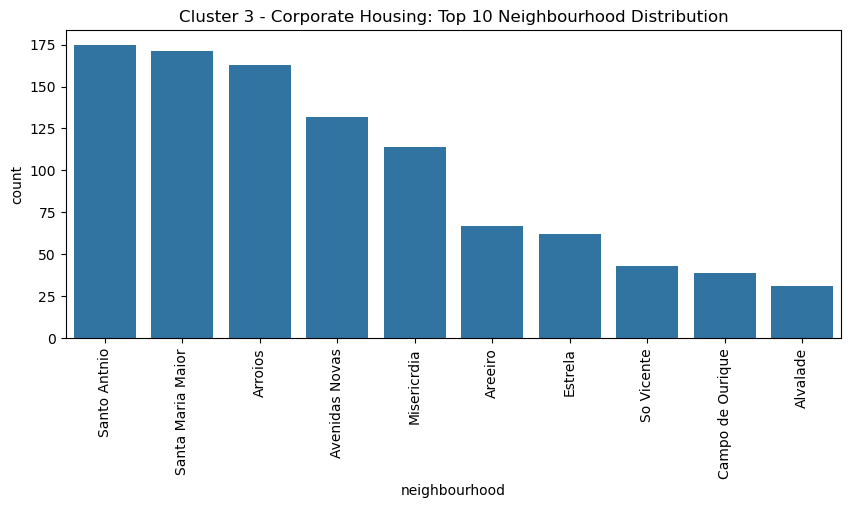

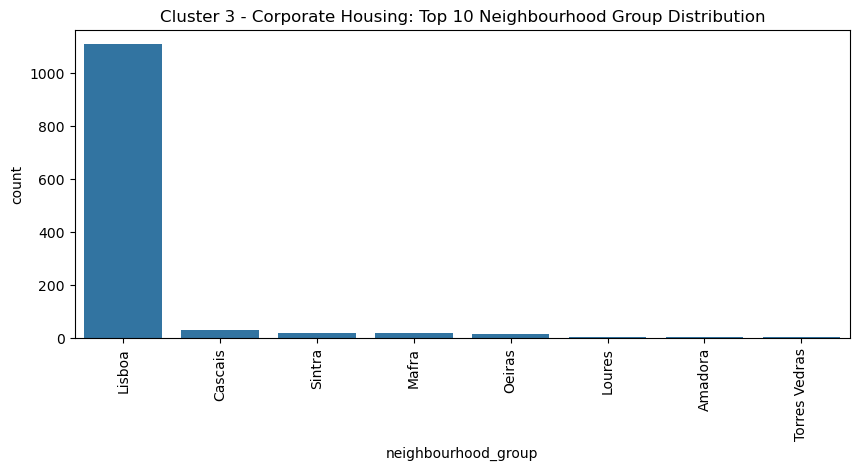

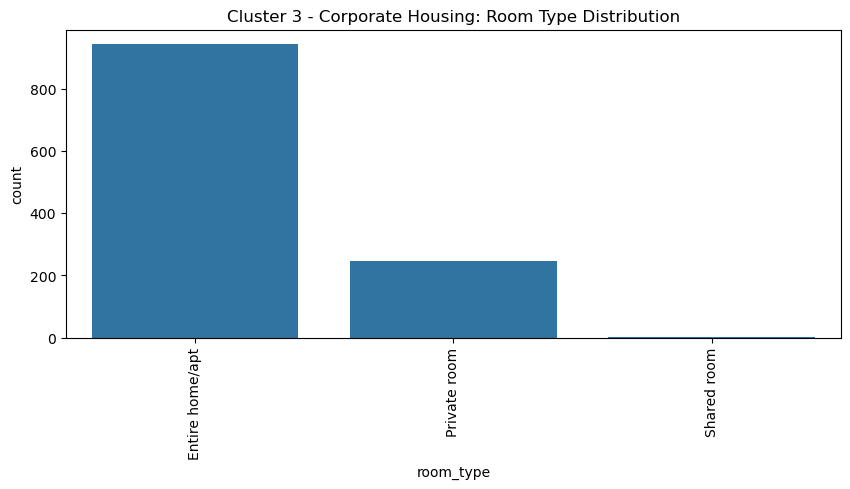

In [74]:
# Filter the DataFrame for Cluster 3
cluster_3_df = listings_df_merge[listings_df_merge['label_kmeans'] == 3]

# Top 10 'host_info' and 'neighbourhood'
top_10_host_info_3 = cluster_3_df['host_info'].value_counts().nlargest(10).index
top_10_neighbourhood_3 = cluster_3_df['neighbourhood'].value_counts().nlargest(10).index
top_10_neighbourhood_group_3 = cluster_3_df['neighbourhood_group'].value_counts().nlargest(10).index

# Countplot for top 10 host_info sorted in descending order
plt.figure(figsize=(10, 4))
sns.countplot(data=cluster_3_df[cluster_3_df['host_info'].isin(top_10_host_info_3)], x='host_info', order=top_10_host_info_3)
plt.title('Cluster 3 - Corporate Housing: Top 10 Host Info Distribution')
plt.xticks(rotation=90)
plt.show()

# Countplot for top 10 neighbourhood sorted in descending order
plt.figure(figsize=(10, 4))
sns.countplot(data=cluster_3_df[cluster_3_df['neighbourhood'].isin(top_10_neighbourhood_3)], x='neighbourhood', order=top_10_neighbourhood_3)
plt.title('Cluster 3 - Corporate Housing: Top 10 Neighbourhood Distribution')
plt.xticks(rotation=90)
plt.show()

# Countplot for top 10 neighbourhood_group sorted in descending order
plt.figure(figsize=(10, 4))
sns.countplot(data=cluster_3_df[cluster_3_df['neighbourhood_group'].isin(top_10_neighbourhood_group_3)], x='neighbourhood_group', order=top_10_neighbourhood_group_3)
plt.title('Cluster 3 - Corporate Housing: Top 10 Neighbourhood Group Distribution')
plt.xticks(rotation=90)
plt.show()

# Countplot for room_type
plt.figure(figsize=(10, 4))
sns.countplot(data=cluster_3_df, x='room_type', order=cluster_3_df['room_type'].value_counts().index)
plt.title('Cluster 3 - Corporate Housing: Room Type Distribution')
plt.xticks(rotation=90)
plt.show()

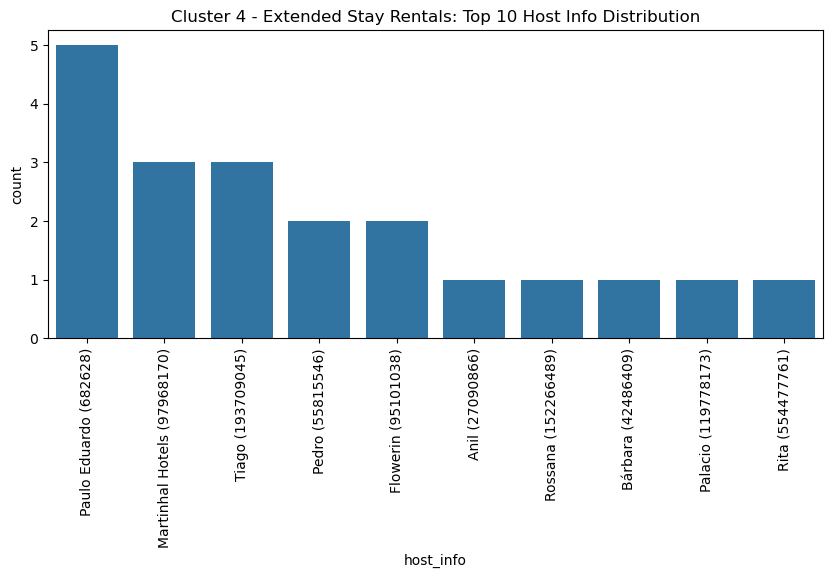

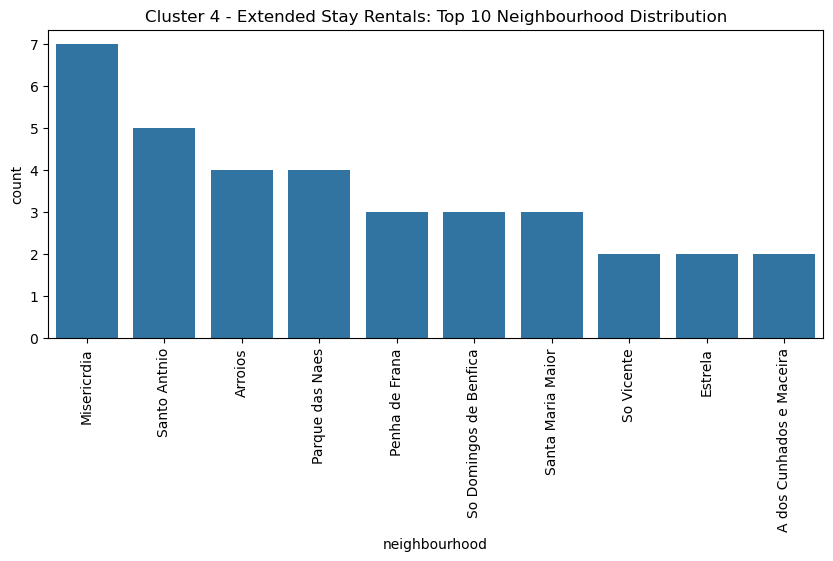

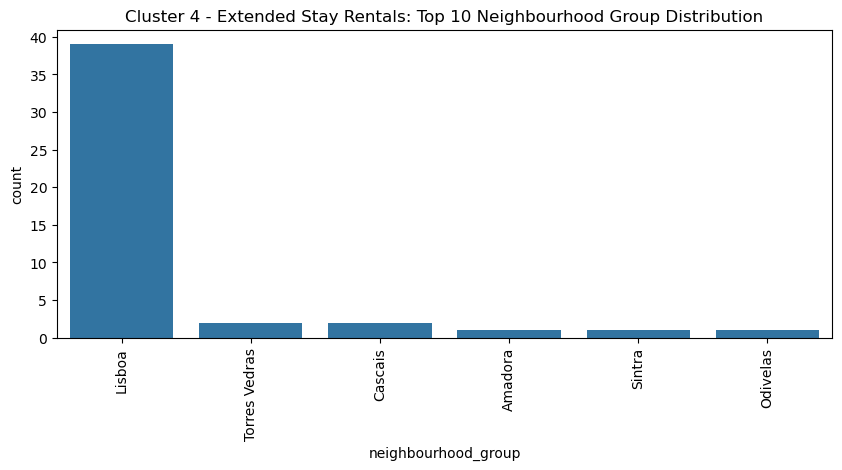

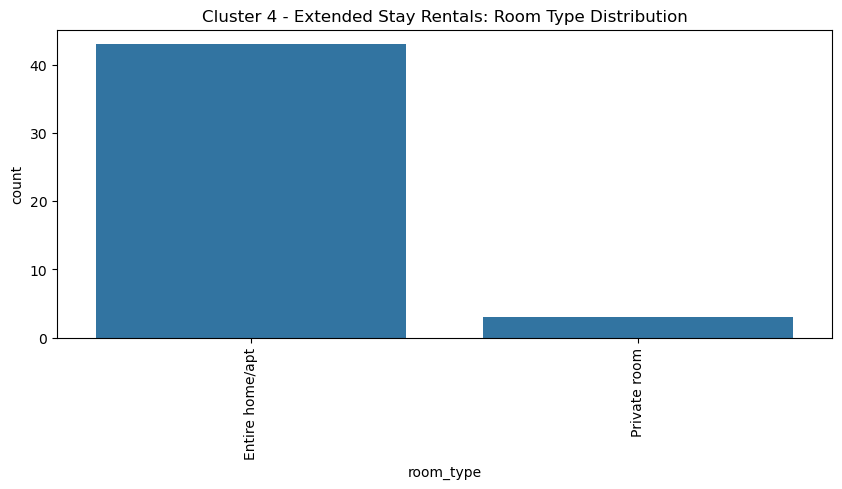

In [75]:
# Filter the DataFrame for Cluster 4
cluster_4_df = listings_df_merge[listings_df_merge['label_kmeans'] == 4]

# Top 10 'host_info' and 'neighbourhood'
top_10_host_info_4 = cluster_4_df['host_info'].value_counts().nlargest(10).index
top_10_neighbourhood_4 = cluster_4_df['neighbourhood'].value_counts().nlargest(10).index
top_10_neighbourhood_group_4 = cluster_4_df['neighbourhood_group'].value_counts().nlargest(10).index

# Countplot for top 10 host_info sorted in descending order
plt.figure(figsize=(10, 4))
sns.countplot(data=cluster_4_df[cluster_4_df['host_info'].isin(top_10_host_info_4)], x='host_info', order=top_10_host_info_4)
plt.title('Cluster 4 - Extended Stay Rentals: Top 10 Host Info Distribution')
plt.xticks(rotation=90)
plt.show()

# Countplot for top 10 neighbourhood sorted in descending order
plt.figure(figsize=(10, 4))
sns.countplot(data=cluster_4_df[cluster_4_df['neighbourhood'].isin(top_10_neighbourhood_4)], x='neighbourhood', order=top_10_neighbourhood_4)
plt.title('Cluster 4 - Extended Stay Rentals: Top 10 Neighbourhood Distribution')
plt.xticks(rotation=90)
plt.show()

# Countplot for top 10 neighbourhood_group sorted in descending order
plt.figure(figsize=(10, 4))
sns.countplot(data=cluster_4_df[cluster_4_df['neighbourhood_group'].isin(top_10_neighbourhood_group_4)], x='neighbourhood_group', order=top_10_neighbourhood_group_4)
plt.title('Cluster 4 - Extended Stay Rentals: Top 10 Neighbourhood Group Distribution')
plt.xticks(rotation=90)
plt.show()

# Countplot for room_type
plt.figure(figsize=(10, 4))
sns.countplot(data=cluster_4_df, x='room_type', order=cluster_4_df['room_type'].value_counts().index)
plt.title('Cluster 4 - Extended Stay Rentals: Room Type Distribution')
plt.xticks(rotation=90)
plt.show()

In [76]:
# Considering the columns 'host_info', 'neighbourhood_group', 'neighbourhood', 'room_type' with categorical variables to analyze
listings_df_merge2=pd.merge(listings_df[['host_info', 'neighbourhood_group', 'neighbourhood', 'room_type']], listings_df_kmeans_columns[['price', 'label_kmeans']], on='id' , how="outer")
listings_df_merge2.head(3)

,host_info,neighbourhood_group,neighbourhood,room_type,price,label_kmeans
id,,,,,,
935509480248268779,Vagner (236955701),Lisboa,Arroios,Private room,30.0,1
1033186766563842755,Flavio (185898036),Lisboa,Arroios,Private room,32.0,3
955103410770875754,Luís (531095694),Lisboa,Estrela,Entire home/apt,75.0,1


In [77]:
def summarize_price_range(df, cluster_label, column):
    # Filter the DataFrame for the specified cluster
    cluster_df = df[df['label_kmeans'] == cluster_label]
    
    # Group by the specified column and calculate price range statistics
    price_summary = cluster_df.groupby(column)['price'].agg(['min', 'max', 'mean']).reset_index()
    
    return price_summary

# Summarize for each cluster
clusters = listings_df_merge2['label_kmeans'].unique()
categorical_columns = ['neighbourhood_group', 'neighbourhood']

# Dictionary to store the summary
price_summary = {cluster: {col: summarize_price_range(listings_df_merge2, cluster, col) for col in categorical_columns} for cluster in clusters}

# Display the summary for each cluster and column
for cluster in price_summary:
    print(f"Cluster {cluster} Price Range Summary:")
    for col in categorical_columns:
        print(f"Price Range for {col}:")
        display(price_summary[cluster][col])
        print("\n")

Cluster 1 Price Range Summary:
Price Range for neighbourhood_group:


,neighbourhood_group,min,max,mean
0,Alenquer,24.0,340.0,114.580000
1,Amadora,14.0,195.0,67.302994
2,Arruda Dos Vinhos,50.0,353.0,139.460000
3,Azambuja,52.0,343.8,161.075000
4,Cadaval,35.0,265.0,116.290909
5,Cascais,12.0,379.0,112.251023
6,Lisboa,10.0,380.0,104.828972
7,Loures,18.0,350.0,82.152153
8,Lourinh,15.0,375.0,129.729596
9,Mafra,14.0,374.0,107.981679




Price Range for neighbourhood:


,neighbourhood,min,max,mean
0,A dos Cunhados e Maceira,12.0,327.0,101.023529
1,Abrigada e Cabanas de Torres,24.0,340.0,149.100000
2,Agualva e Mira-Sintra,25.0,180.0,58.302703
3,Ajuda,29.0,229.0,90.747297
4,Alcabideche,18.0,350.0,107.359748
...,...,...,...,...
122,Vila Nova da Rainha,123.0,123.0,123.000000
123,Vila Verde dos Francos,48.0,204.0,99.350000
124,Vilar,84.0,191.0,130.777778
125,Vimeiro,70.0,120.0,87.750000




Cluster 3 Price Range Summary:
Price Range for neighbourhood_group:


,neighbourhood_group,min,max,mean
0,Amadora,97.4,97.4,97.400000
1,Cascais,45.0,369.0,119.973333
2,Lisboa,16.0,400.0,107.054824
3,Loures,113.0,119.0,116.666667
4,Mafra,46.0,230.0,99.800000
5,Oeiras,72.0,325.0,114.750000
6,Sintra,20.0,288.0,101.666667
7,Torres Vedras,155.0,155.0,155.000000




Price Range for neighbourhood:


,neighbourhood,min,max,mean
0,Ajuda,32.0,102.0,52.600000
1,Alcabideche,78.0,94.0,86.000000
2,Alcntara,68.0,247.0,125.538462
3,"Algs, Linda-a-Velha e Cruz Quebrada-Dafundo",81.0,98.0,88.000000
4,Alvalade,67.0,187.0,130.754839
5,Areeiro,17.0,243.0,84.510448
6,Arroios,24.0,319.0,95.471166
7,Avenidas Novas,16.0,355.0,111.169697
8,Beato,58.0,58.0,58.000000
9,Belm,77.2,123.0,100.100000




Cluster 2 Price Range Summary:
Price Range for neighbourhood_group:


,neighbourhood_group,min,max,mean
0,Alenquer,100.0,120.0,113.333333
1,Amadora,15.0,140.0,51.146939
2,Cadaval,35.0,35.0,35.000000
3,Cascais,23.0,400.0,94.133981
4,Lisboa,12.0,443.0,98.487791
5,Loures,17.0,170.0,55.724138
6,Lourinh,50.0,109.0,82.000000
7,Mafra,17.0,317.0,79.113514
8,Odivelas,16.0,80.0,40.181818
9,Oeiras,25.0,370.0,75.546269




Price Range for neighbourhood:


,neighbourhood,min,max,mean
0,A dos Cunhados e Maceira,90.0,90.0,90.000000
1,Agualva e Mira-Sintra,26.0,60.0,33.625000
2,Ajuda,25.0,197.0,72.878378
3,Alcabideche,59.0,117.0,82.500000
4,Alcntara,30.0,210.0,82.189286
...,...,...,...,...
76,Turcifal,65.0,65.0,65.000000
77,Venteira,38.0,140.0,59.733333
78,Vila Franca de Xira,30.0,30.0,30.000000
79,Vila Verde dos Francos,120.0,120.0,120.000000




Cluster 0 Price Range Summary:
Price Range for neighbourhood_group:


,neighbourhood_group,min,max,mean
0,Alenquer,631.0,631.0,631.000000
1,Amadora,400.0,400.0,400.000000
2,Cadaval,400.0,780.0,503.250000
3,Cascais,379.0,1959.0,690.259542
4,Lisboa,380.0,2000.0,655.982090
5,Loures,400.0,1000.0,618.285714
6,Lourinh,386.0,895.0,533.904762
7,Mafra,380.0,1063.0,596.068182
8,Odivelas,480.0,480.0,480.000000
9,Oeiras,390.0,1180.0,656.750000




Price Range for neighbourhood:


,neighbourhood,min,max,mean
0,A dos Cunhados e Maceira,450.0,800.0,625.000000
1,Agualva e Mira-Sintra,945.0,945.0,945.000000
2,Ajuda,500.0,1588.0,958.000000
3,Alcabideche,400.0,1959.0,881.636364
4,Alcntara,380.0,550.0,454.000000
5,Alenquer (Santo Estvo e Triana),631.0,631.0,631.000000
6,"Algs, Linda-a-Velha e Cruz Quebrada-Dafundo",1026.0,1180.0,1103.000000
7,Alguber,780.0,780.0,780.000000
8,"Alhandra, So Joo dos Montes e Calhandriz",850.0,850.0,850.000000
9,"Almargem do Bispo, Pro Pinheiro e Montelavar",422.0,500.0,448.000000




Cluster 4 Price Range Summary:
Price Range for neighbourhood_group:


,neighbourhood_group,min,max,mean
0,Amadora,103.6,103.6,103.600000
1,Cascais,140.0,856.0,498.000000
2,Lisboa,14.0,599.0,118.107692
3,Odivelas,81.2,81.2,81.200000
4,Sintra,49.0,49.0,49.000000
5,Torres Vedras,163.4,163.4,163.400000




Price Range for neighbourhood:


,neighbourhood,min,max,mean
0,A dos Cunhados e Maceira,163.4,163.4,163.400000
1,Alcntara,185.6,185.6,185.600000
2,Alvalade,14.0,14.0,14.000000
3,Arroios,65.0,132.2,107.100000
4,Avenidas Novas,91.0,91.0,91.000000
5,Benfica,60.0,60.0,60.000000
6,Campo de Ourique,60.0,60.0,60.000000
7,Carcavelos e Parede,856.0,856.0,856.000000
8,Cascais e Estoril,140.0,140.0,140.000000
9,Estrela,98.0,200.0,149.000000


In [78]:
# Define price bins
price_bins = [0, 50, 100, 150, 200, 300, 400, 500, np.inf]
price_labels = ['0-50', '50-100', '100-150', '150-200', '200-300', '300-400', '400-500', '500+']

# Bin the prices
listings_df_merge2['price_range'] = pd.cut(listings_df_merge2['price'], bins=price_bins, labels=price_labels, include_lowest=True)

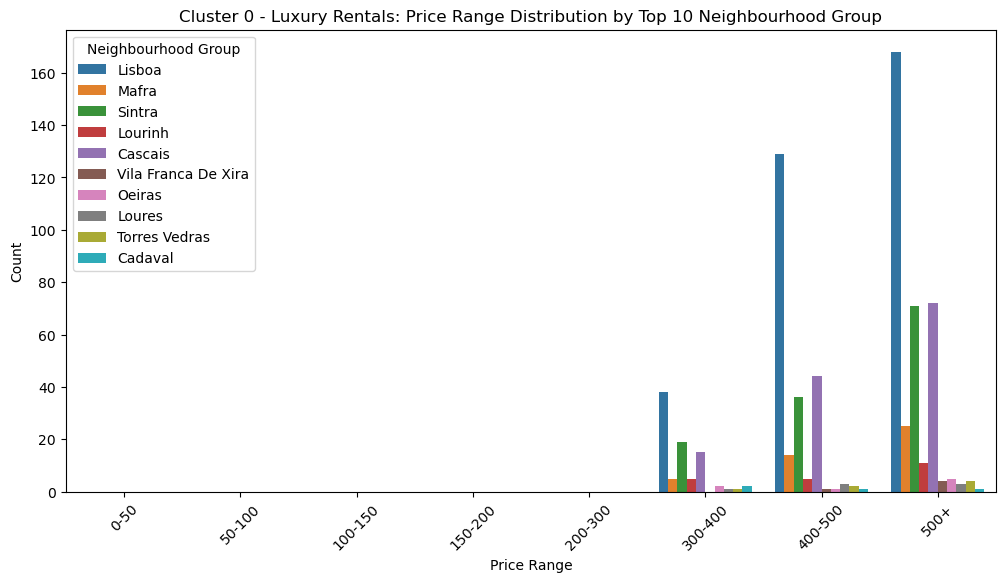

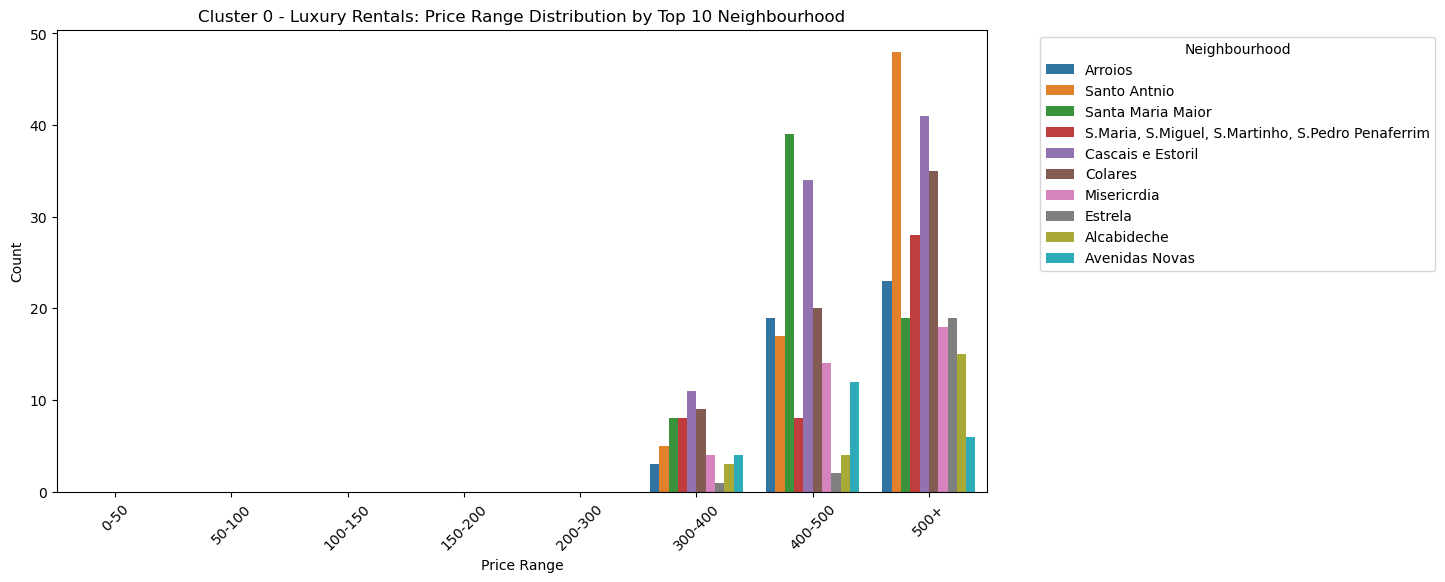

In [79]:
# Filter the DataFrame for Cluster 0
cluster_0_df = listings_df_merge2[listings_df_merge2['label_kmeans'] == 0]

# Top 10 neighbourhood_group and neighbourhood
top_10_neighbourhood_group_0 = cluster_0_df['neighbourhood_group'].value_counts().nlargest(10).index
top_10_neighbourhood_0 = cluster_0_df['neighbourhood'].value_counts().nlargest(10).index

# Barplot for price range distribution by top 10 neighbourhood_group
plt.figure(figsize=(12, 6))
sns.countplot(data=cluster_0_df[cluster_0_df['neighbourhood_group'].isin(top_10_neighbourhood_group_0)], x='price_range', hue='neighbourhood_group')
plt.title('Cluster 0 - Luxury Rentals: Price Range Distribution by Top 10 Neighbourhood Group')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Neighbourhood Group')
plt.show()

# Barplot for price range distribution by top 10 neighbourhood
plt.figure(figsize=(12, 6))
sns.countplot(data=cluster_0_df[cluster_0_df['neighbourhood'].isin(top_10_neighbourhood_0)], x='price_range', hue='neighbourhood')
plt.title('Cluster 0 - Luxury Rentals: Price Range Distribution by Top 10 Neighbourhood')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

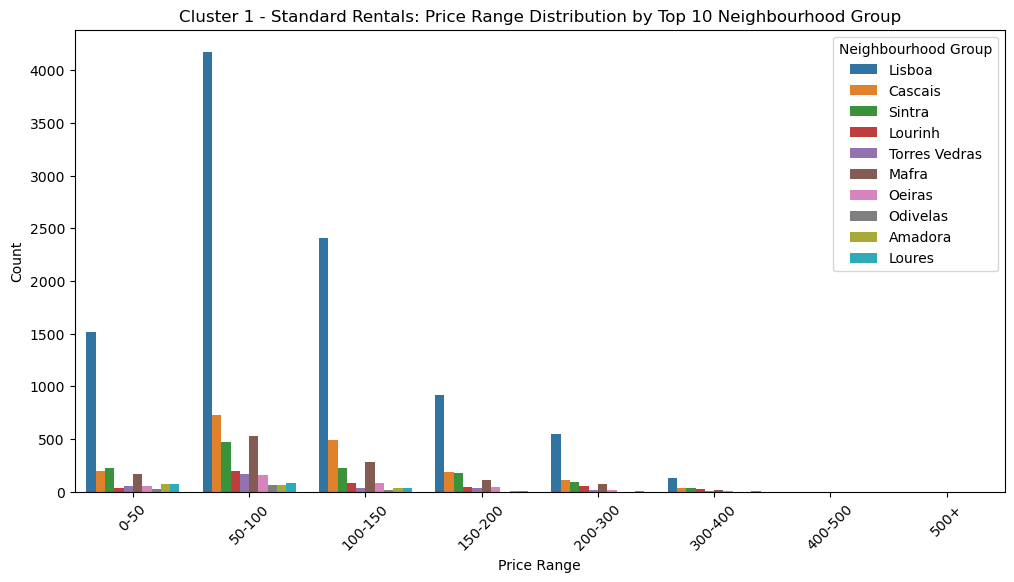

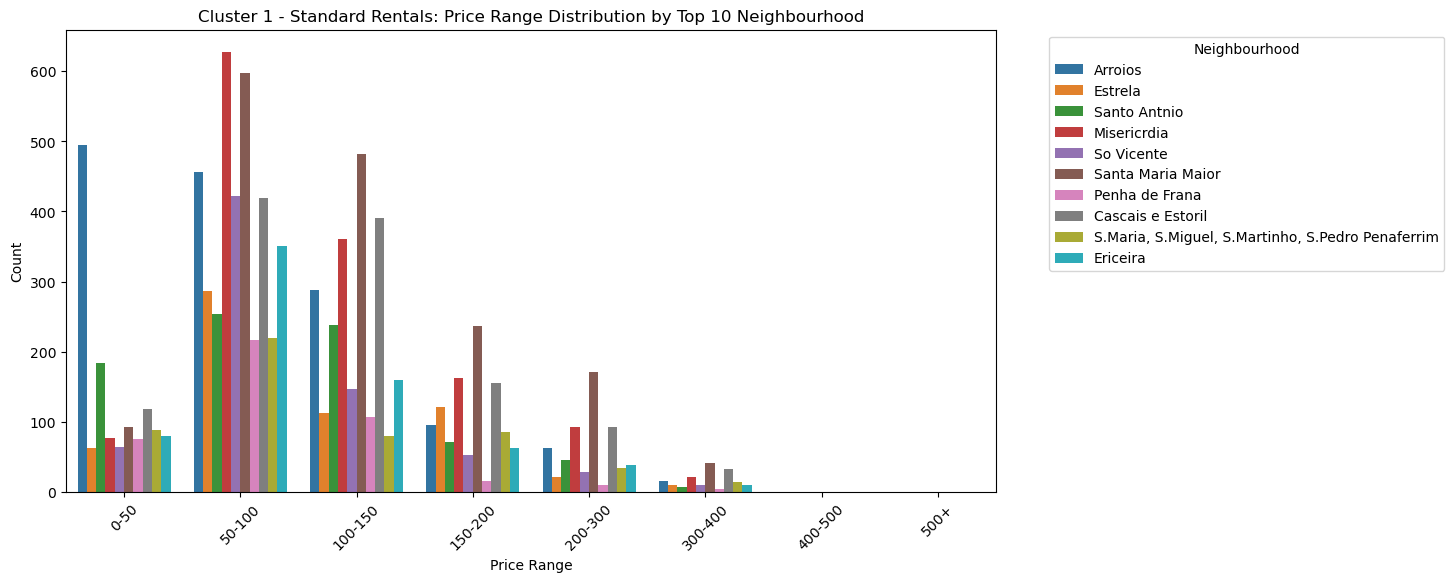

In [80]:
# Filter the DataFrame for Cluster 1
cluster_1_df = listings_df_merge2[listings_df_merge2['label_kmeans'] == 1]

# Top 10 neighbourhood_group and neighbourhood
top_10_neighbourhood_group_1 = cluster_1_df['neighbourhood_group'].value_counts().nlargest(10).index
top_10_neighbourhood_1 = cluster_1_df['neighbourhood'].value_counts().nlargest(10).index

# Barplot for price range distribution by top 10 neighbourhood_group
plt.figure(figsize=(12, 6))
sns.countplot(data=cluster_1_df[cluster_1_df['neighbourhood_group'].isin(top_10_neighbourhood_group_1)], x='price_range', hue='neighbourhood_group')
plt.title('Cluster 1 - Standard Rentals: Price Range Distribution by Top 10 Neighbourhood Group')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Neighbourhood Group')
plt.show()

# Barplot for price range distribution by top 10 neighbourhood
plt.figure(figsize=(12, 6))
sns.countplot(data=cluster_1_df[cluster_1_df['neighbourhood'].isin(top_10_neighbourhood_1)], x='price_range', hue='neighbourhood')
plt.title('Cluster 1 - Standard Rentals: Price Range Distribution by Top 10 Neighbourhood')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

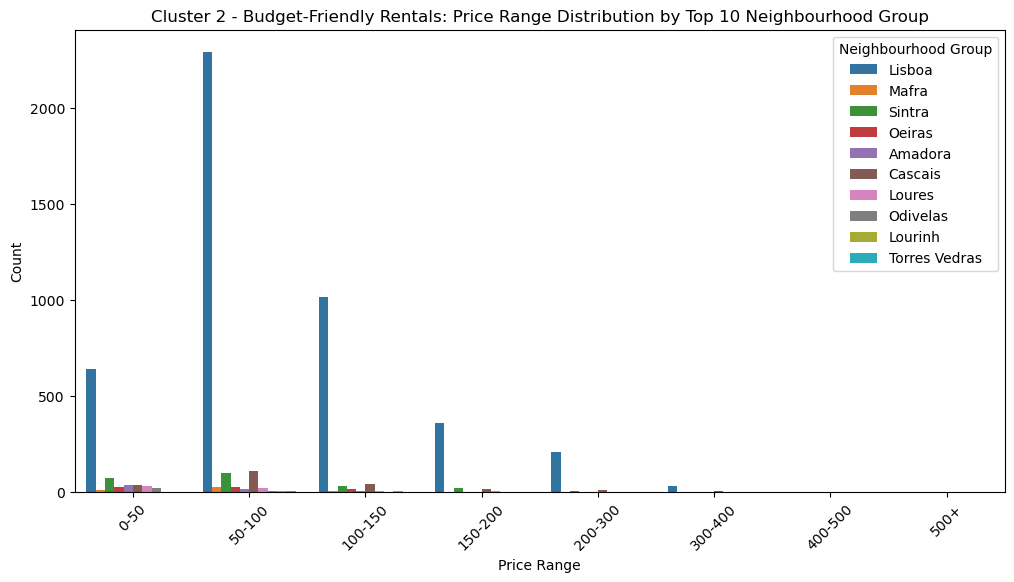

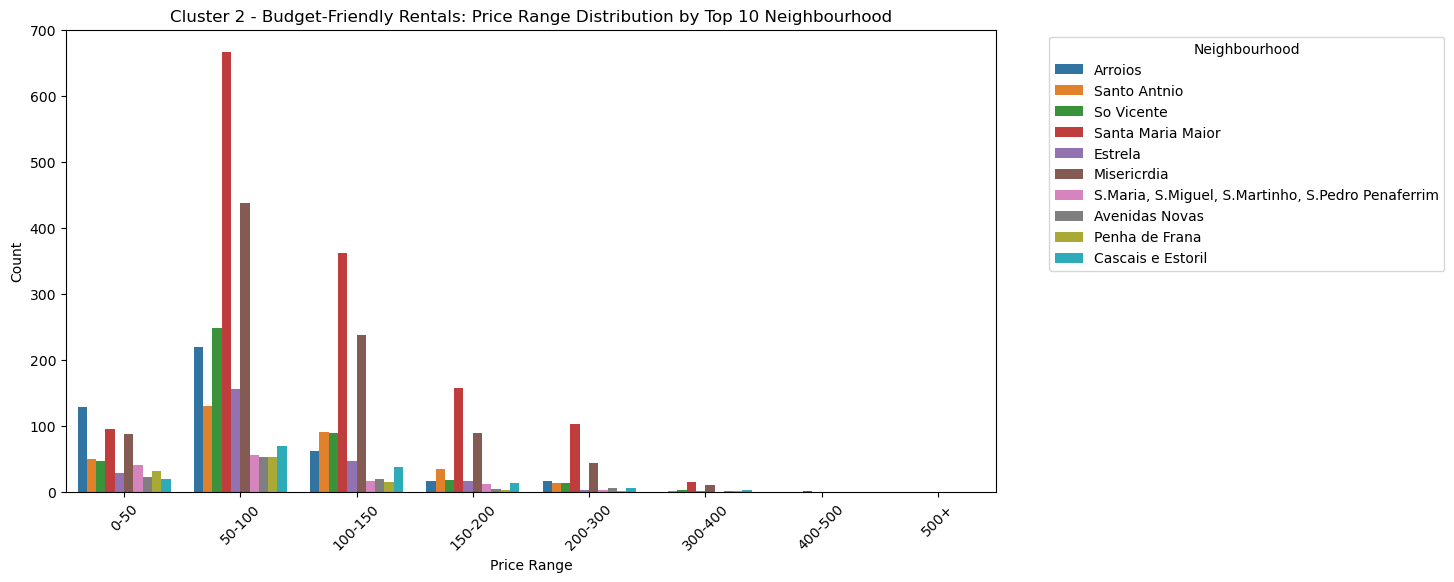

In [81]:
# Filter the DataFrame for Cluster 2
cluster_2_df = listings_df_merge2[listings_df_merge2['label_kmeans'] == 2]

# Top 10 neighbourhood_group and neighbourhood
top_10_neighbourhood_group_2 = cluster_2_df['neighbourhood_group'].value_counts().nlargest(10).index
top_10_neighbourhood_2 = cluster_2_df['neighbourhood'].value_counts().nlargest(10).index

# Barplot for price range distribution by top 10 neighbourhood_group
plt.figure(figsize=(12, 6))
sns.countplot(data=cluster_2_df[cluster_2_df['neighbourhood_group'].isin(top_10_neighbourhood_group_2)], x='price_range', hue='neighbourhood_group')
plt.title('Cluster 2 - Budget-Friendly Rentals: Price Range Distribution by Top 10 Neighbourhood Group')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Neighbourhood Group')
plt.show()

# Barplot for price range distribution by top 10 neighbourhood
plt.figure(figsize=(12, 6))
sns.countplot(data=cluster_2_df[cluster_2_df['neighbourhood'].isin(top_10_neighbourhood_2)], x='price_range', hue='neighbourhood')
plt.title('Cluster 2 - Budget-Friendly Rentals: Price Range Distribution by Top 10 Neighbourhood')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

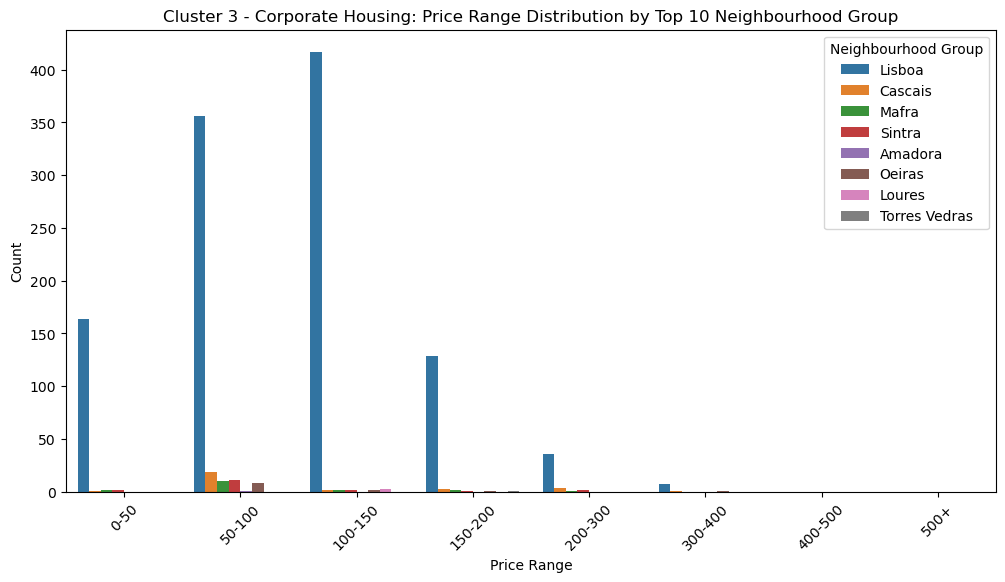

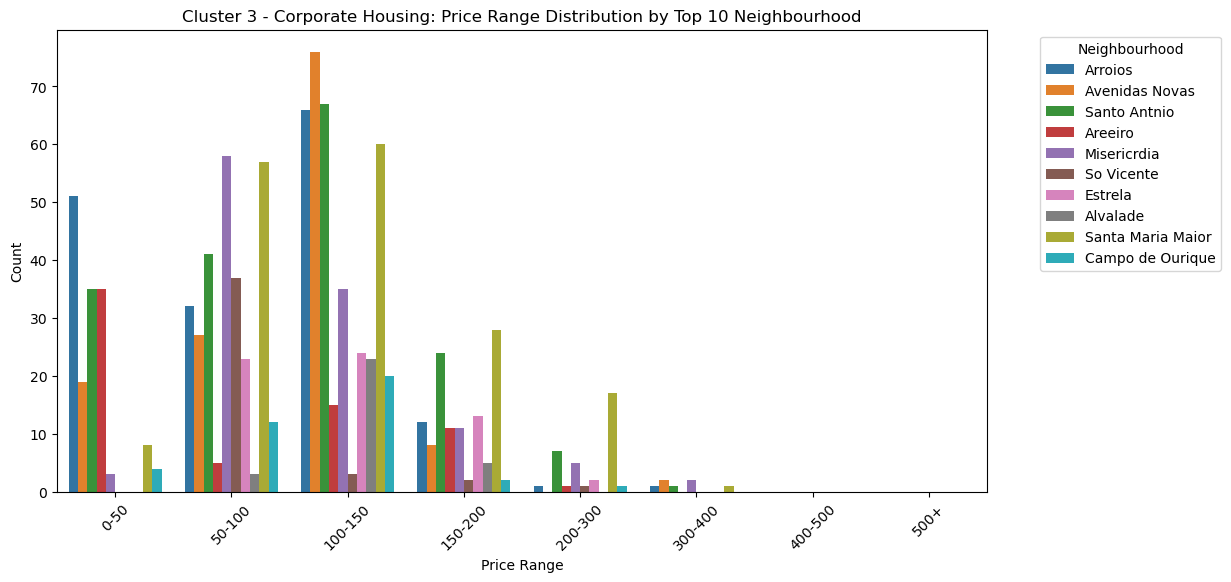

In [82]:
# Filter the DataFrame for Cluster 3
cluster_3_df = listings_df_merge2[listings_df_merge2['label_kmeans'] == 3]

# Top 10 neighbourhood_group and neighbourhood
top_10_neighbourhood_group_3 = cluster_3_df['neighbourhood_group'].value_counts().nlargest(10).index
top_10_neighbourhood_3 = cluster_3_df['neighbourhood'].value_counts().nlargest(10).index

# Barplot for price range distribution by top 10 neighbourhood_group
plt.figure(figsize=(12, 6))
sns.countplot(data=cluster_3_df[cluster_3_df['neighbourhood_group'].isin(top_10_neighbourhood_group_3)], x='price_range', hue='neighbourhood_group')
plt.title('Cluster 3 - Corporate Housing: Price Range Distribution by Top 10 Neighbourhood Group')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Neighbourhood Group')
plt.show()

# Barplot for price range distribution by top 10 neighbourhood
plt.figure(figsize=(12, 6))
sns.countplot(data=cluster_3_df[cluster_3_df['neighbourhood'].isin(top_10_neighbourhood_3)], x='price_range', hue='neighbourhood')
plt.title('Cluster 3 - Corporate Housing: Price Range Distribution by Top 10 Neighbourhood')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

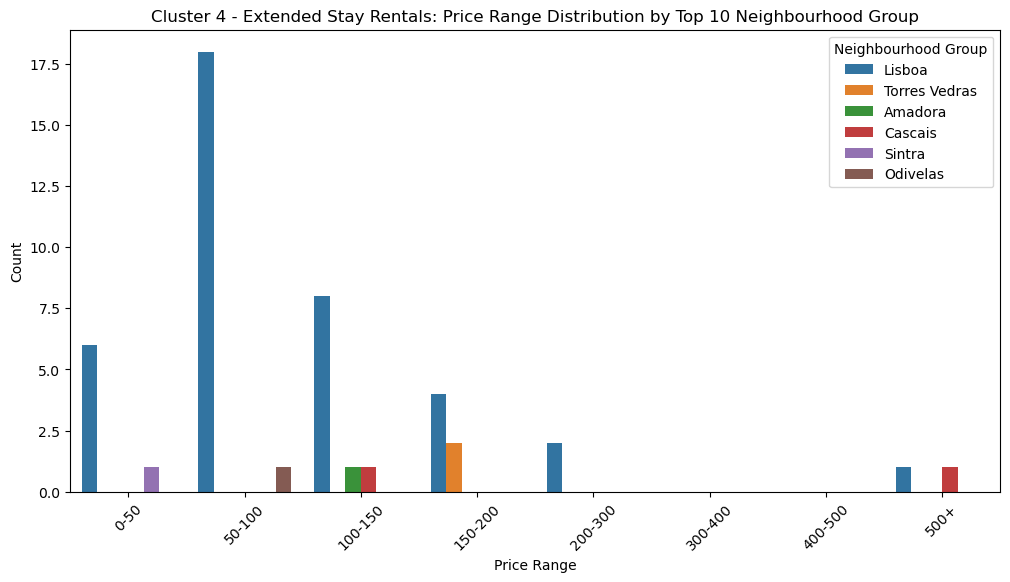

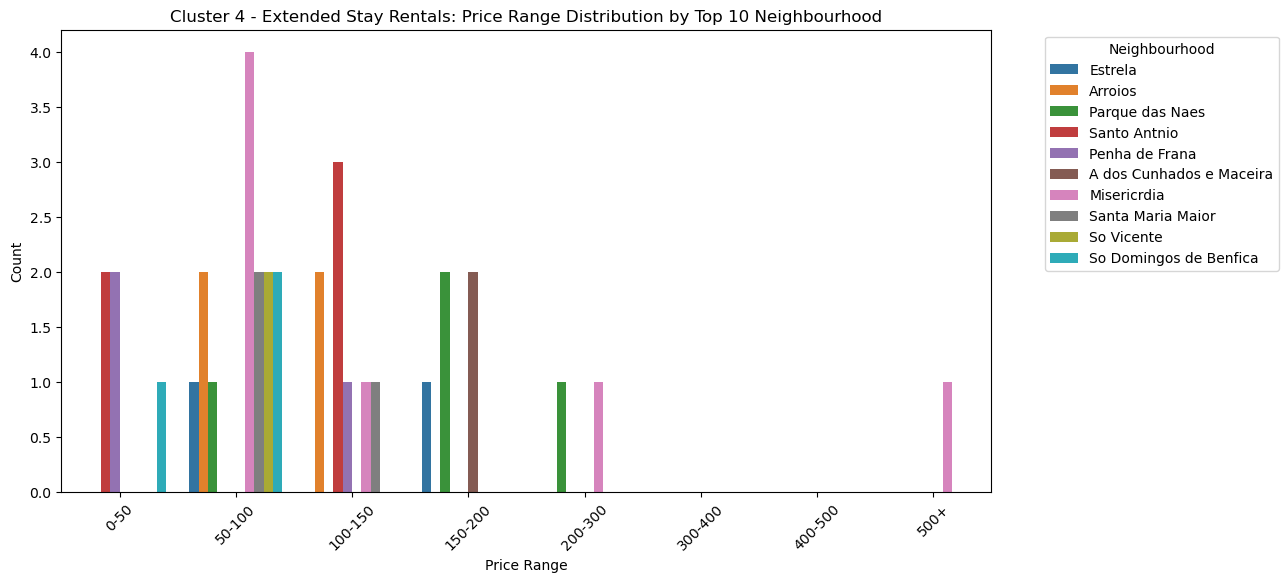

In [83]:
# Filter the DataFrame for Cluster 4
cluster_4_df = listings_df_merge2[listings_df_merge2['label_kmeans'] == 4]

# Top 10 neighbourhood_group and neighbourhood
top_10_neighbourhood_group_4 = cluster_4_df['neighbourhood_group'].value_counts().nlargest(10).index
top_10_neighbourhood_4 = cluster_4_df['neighbourhood'].value_counts().nlargest(10).index

# Barplot for price range distribution by top 10 neighbourhood_group
plt.figure(figsize=(12, 6))
sns.countplot(data=cluster_4_df[cluster_4_df['neighbourhood_group'].isin(top_10_neighbourhood_group_4)], x='price_range', hue='neighbourhood_group')
plt.title('Cluster 4 - Extended Stay Rentals: Price Range Distribution by Top 10 Neighbourhood Group')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Neighbourhood Group')
plt.show()

# Barplot for price range distribution by top 10 neighbourhood
plt.figure(figsize=(12, 6))
sns.countplot(data=cluster_4_df[cluster_4_df['neighbourhood'].isin(top_10_neighbourhood_4)], x='price_range', hue='neighbourhood')
plt.title('Cluster 4 - Extended Stay Rentals: Price Range Distribution by Top 10 Neighbourhood')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()